# Table of contents
1. [Introduction](#introduction)
2. [Data preprocessing](#Data_preprocessing)
3. [Exploratory Data Analysis](#Data_exploration)



<a id='introduction'></a><br>

This is a beginners attempt for Exploratory Data Analysis using Python pandas for processing and matplotlib/seaborn for visualizations.<br>



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import itertools
sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("../input/IMDB-Movie-Data.csv")

In [3]:
print(data.columns)
print(50*'-')
print(data.dtypes)
print(50*'-')
print(data.shape)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')
--------------------------------------------------
Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object
--------------------------------------------------
(1000, 12)


<a id='Data_preprocessing'></a>
<h2><b>Data preprocessing</b></h2>

Lest rename the Runtime and Revenue columns

In [4]:
data.rename({'Runtime (Minutes)': 'Duration', 'Revenue (Millions)':'Revenue'}, axis='columns',inplace=True)

<b>Checking for Nans</b>

In [5]:
print('The dataset contains NaN values: ',data.isnull().values.any())
print('Missing values in the dataset : ',data.isnull().values.sum())
for col in data.columns:
    nans=pd.value_counts(data[col].isnull())
    if len(nans)>1:
        print('Column: ',col,' , Missing values: ',nans[1])

The dataset contains NaN values:  True
Missing values in the dataset :  192
Column:  Revenue  , Missing values:  128
Column:  Metascore  , Missing values:  64


We have a total of 192 missing data. 128 of them are in the Revenue column and the rest 64 are in the Metascore column.
This means that for every missing value, we have the corresponding movie's Rating and Votes. So we could try to replace the missing values with some relevant number based on the features we got. For simplicity, i will keep the NaNs as is for now.

In [6]:
Nans=data[pd.isnull(data).any(axis=1)]
print(Nans.head())

    Rank                    Title    ...    Revenue Metascore
7      8                 Mindhorn    ...        NaN      71.0
22    23           Hounds of Love    ...        NaN      72.0
25    26          Paris pieds nus    ...        NaN       NaN
26    27  Bahubali: The Beginning    ...       6.50       NaN
27    28               Dead Awake    ...       0.01       NaN

[5 rows x 12 columns]


<a id='Data_exploration'></a><br>
<h2><b>Exploratory Data Analysis</b></h2>

In [7]:
data.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue,Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A frustrated circus magician from Kansas is tr...,Ridley Scott,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


First of all lets take a better look at the above statistics for some of the columns of the data.

There are 207 Genre types, 644 Directors and 996 Actors in this dataset.(these numbers would have changed if we had discarded the NaN values.)<br>
<u>Movie Durations:</u><br>
The most frequent Genre type is Action,Adventure,Sci-Fi having 50 counts and the most frequent Director is Ridley Scott having 8 movies in the data.<br>
The mean movie duration is 113 minutes. The shortest movie was 66 minutes long and the longest movie was 2.5 hours for the movie lovers. Half of the movies had a duration less than 111 minutes and 75% of them less than 2 hours.<br>
<u>Movie Ratings:</u><br>
The average rating is 6.7. Half of the movies were rated below 6.8 while 75% of them below 7.4.<br>
The worst movie had a poor rating of 1.9 while the best movie was rated with 9 points.<br>
<u>Votes:</u><br>
The IMDB community is pretty active, as we will see:<br>
The mean number of votes is 169.808. The lowest number of votes is 61 and the highest is 1.791.916  .<br>
Half of the movies have less than 110.799 votes and 75% of them less than 239.909<br>
<u>Here comes the money:</u><br>
We see that the mean Revenue is almost 83 million dollars. The highest revenue is almost a billion dollars (937 million)<br>
25% of the movies had a revenue below 13 million, half of them below 48 million and 75% of them below 114 million dollars.<br>
<u>Metascore:</u><br>
The Metascores range is between 11(worst) to 100(best). Half of the metascore values are below 59.5 and 75% of them below 72.<br>
The mean metascore is 59 points 

In [8]:
data.dropna(inplace=True)

In [9]:
actors=list(actor.split(',') for actor in data.Actors)
actors=list(itertools.chain.from_iterable(actors))
actors = [actor.strip(' ') for actor in actors]
actors_count=pd.value_counts(actors)
print('There are ',len(actors), 'different actors in the dataset,after removing NaN rows')

There are  3351 different actors in the dataset,after removing NaN rows


Now we will drop all the NaN values from the dataset and continue to analyze the rest of it.

Next lets see how the feutures of the data relate to each other.

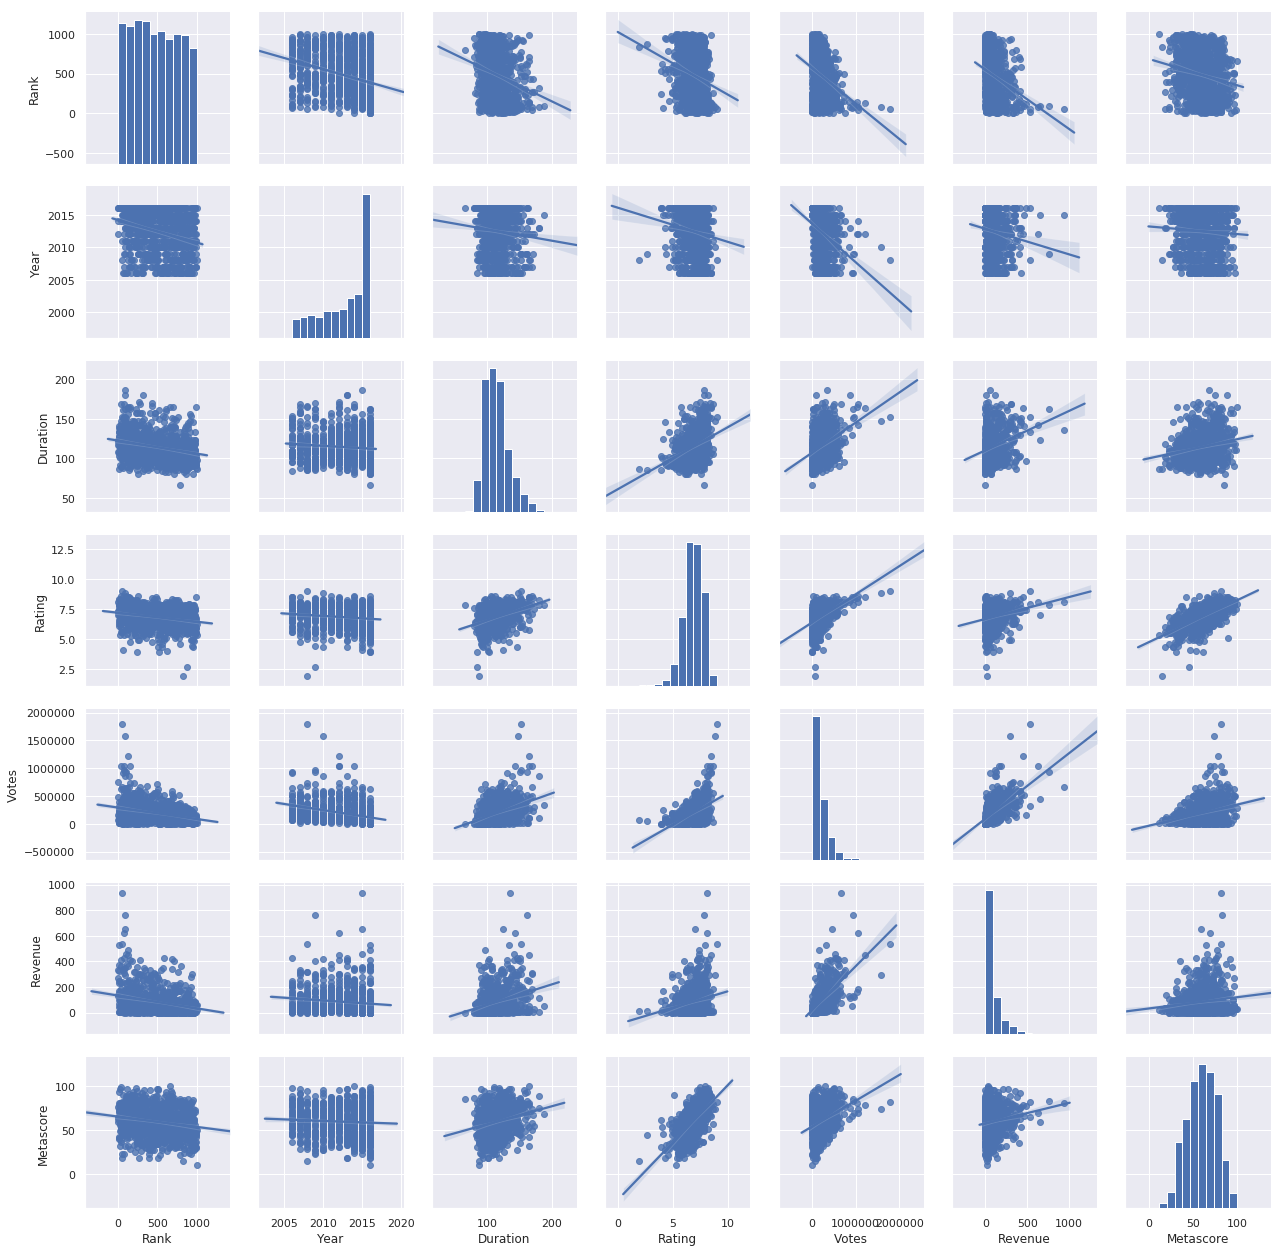

In [10]:
sns.pairplot(data,kind="reg")

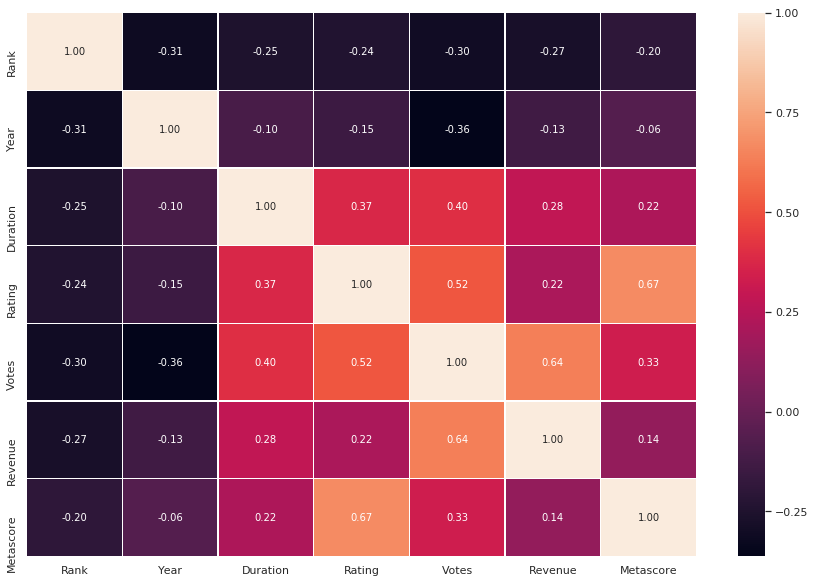

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

We see that the highiest correlation is between  Votes and Rating and the second in order is between Revenue and Votes.<br>


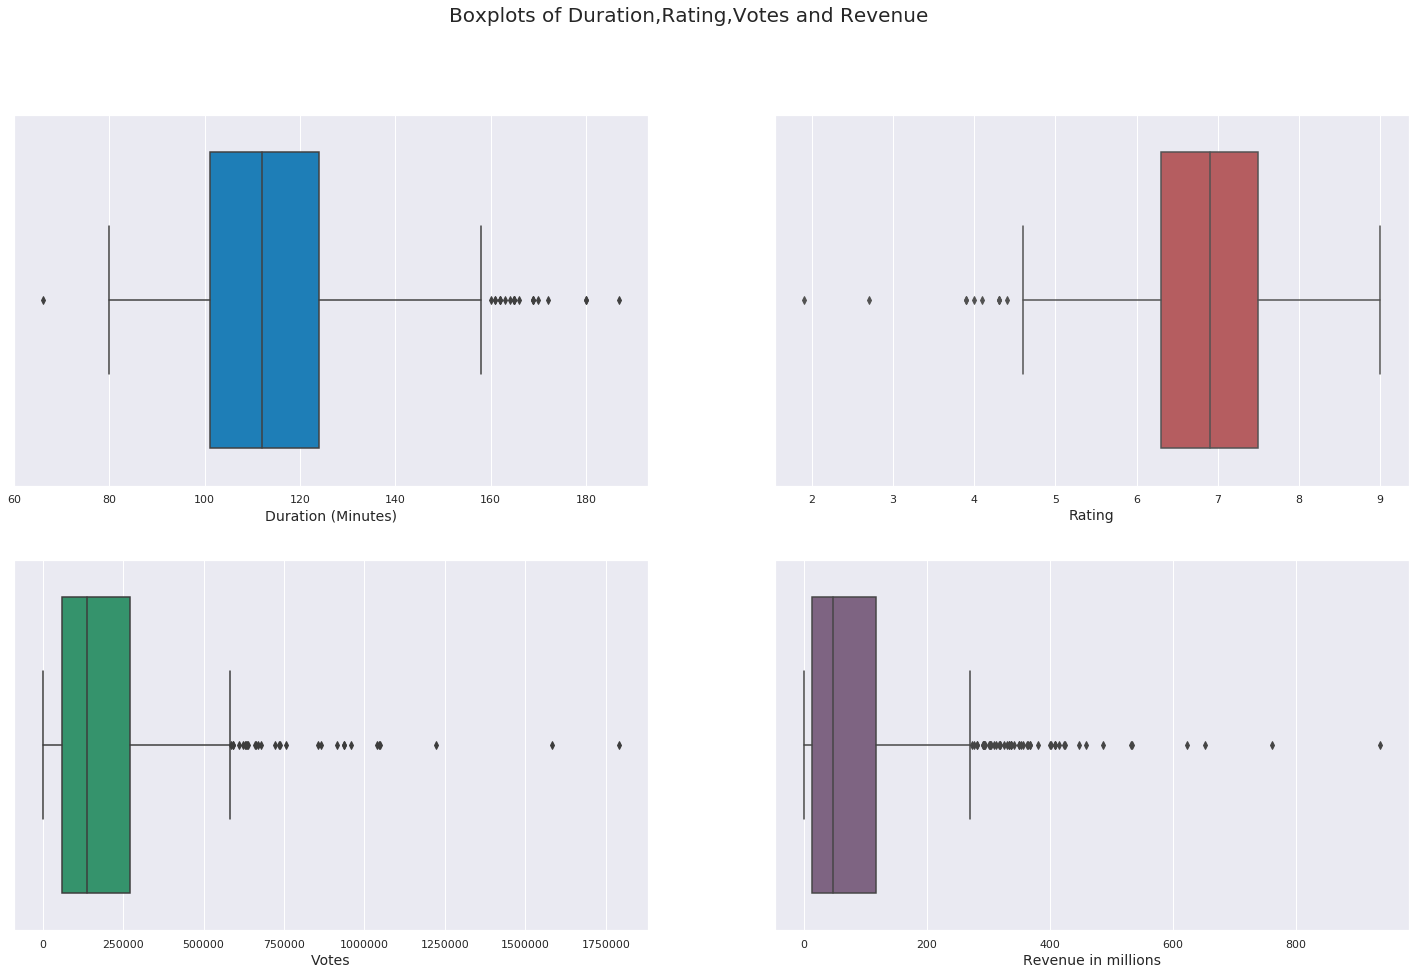

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(25,15))
plt.suptitle('Boxplots of Duration,Rating,Votes and Revenue',fontsize=20)
sns.boxplot(data.Duration,ax=axs[0][0],color=sns.xkcd_rgb["cerulean"])
axs[0][0].set_xlabel('Duration (Minutes)',fontsize=14)
sns.boxplot(data.Rating,ax=axs[0][1],color='r')
axs[0][1].set_xlabel('Rating',fontsize=14)
sns.boxplot(data.Votes,ax=axs[1][0],color=sns.xkcd_rgb["teal green"])
axs[1][0].set_xlabel('Votes',fontsize=14)
sns.boxplot(data.Revenue,ax=axs[1][1],color=sns.xkcd_rgb["dusty purple"])
axs[1][1].set_xlabel('Revenue in millions',fontsize=14)
plt.show()

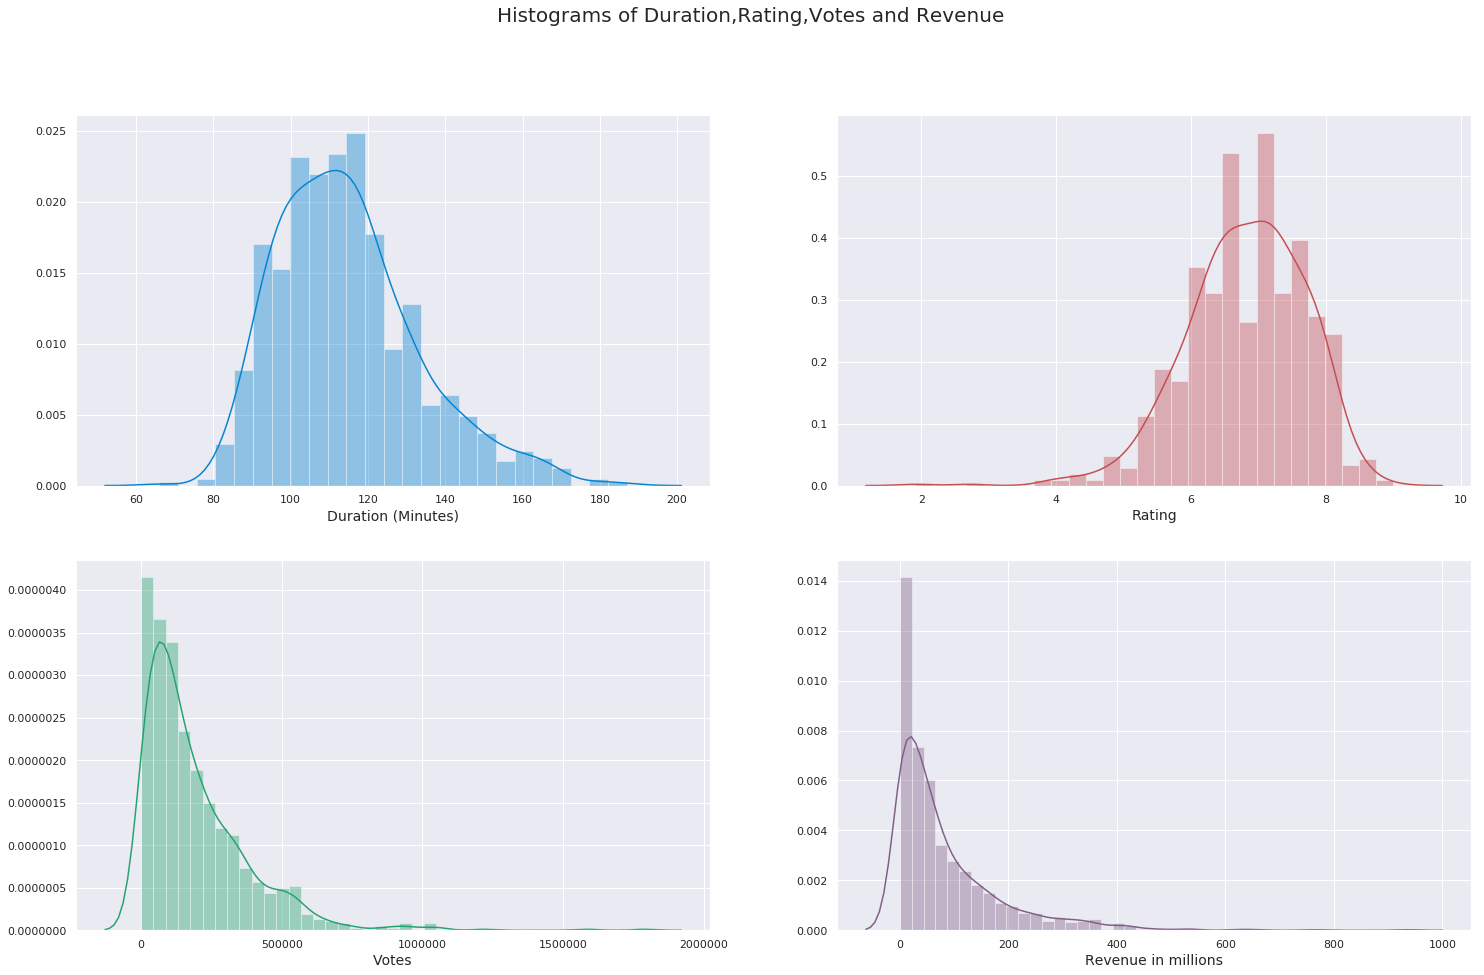

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(25, 15))
plt.suptitle('Histograms of Duration,Rating,Votes and Revenue',fontsize=20)
sns.distplot(data.Duration,ax=axs[0][0],color=sns.xkcd_rgb["cerulean"])
axs[0][0].set_xlabel('Duration (Minutes)',fontsize=14)
sns.distplot(data.Rating,ax=axs[0][1],color='r')
axs[0][1].set_xlabel('Rating',fontsize=14)
sns.distplot(data.Votes,ax=axs[1][0],color=sns.xkcd_rgb["teal green"])
axs[1][0].set_xlabel('Votes',fontsize=14)
sns.distplot(data.Revenue,ax=axs[1][1],color=sns.xkcd_rgb["dusty purple"])
axs[1][1].set_xlabel('Revenue in millions',fontsize=14)
plt.show()

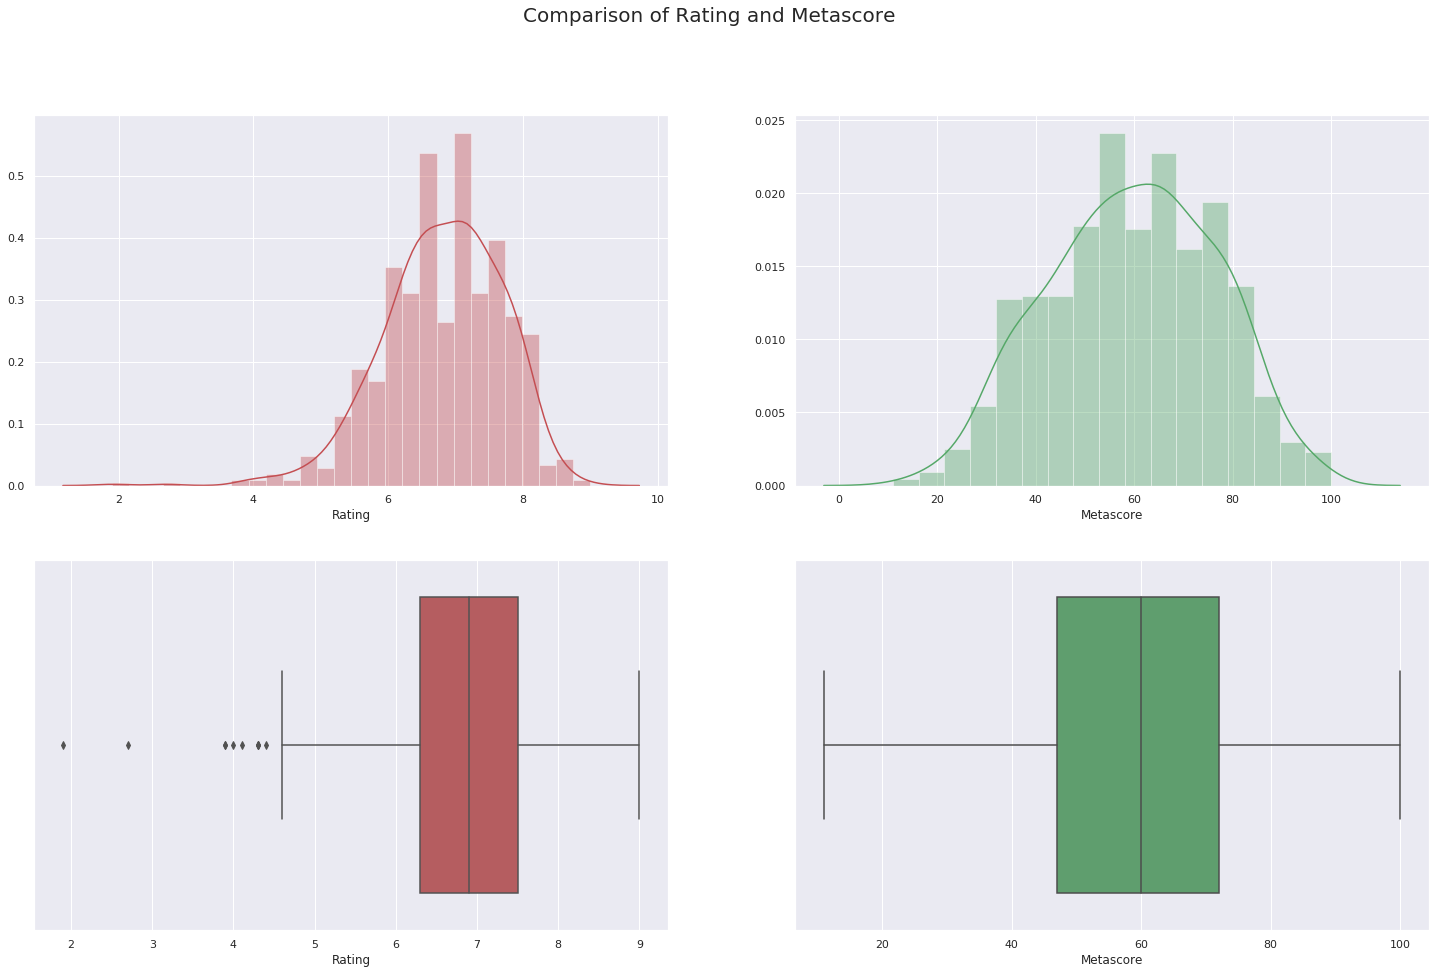

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(25, 15))
plt.suptitle('Comparison of Rating and Metascore',fontsize=20)
sns.distplot(data.Metascore,ax=axs[0][1],color='g')
sns.distplot(data.Rating,ax=axs[0][0],color='r')
sns.boxplot(data.Metascore,ax=axs[1][1],color='g')
sns.boxplot(data.Rating,ax=axs[1][0],color='r')
plt.show()

We can visually see that the Rating is a bit more strict than the Metascore values.<br>
Metascore is more uniformly distributed than Rating and has a relatively wider range of values.<br>
<br>
Next, lets see some more graphs about how Rating and Metascore affects the Revenue

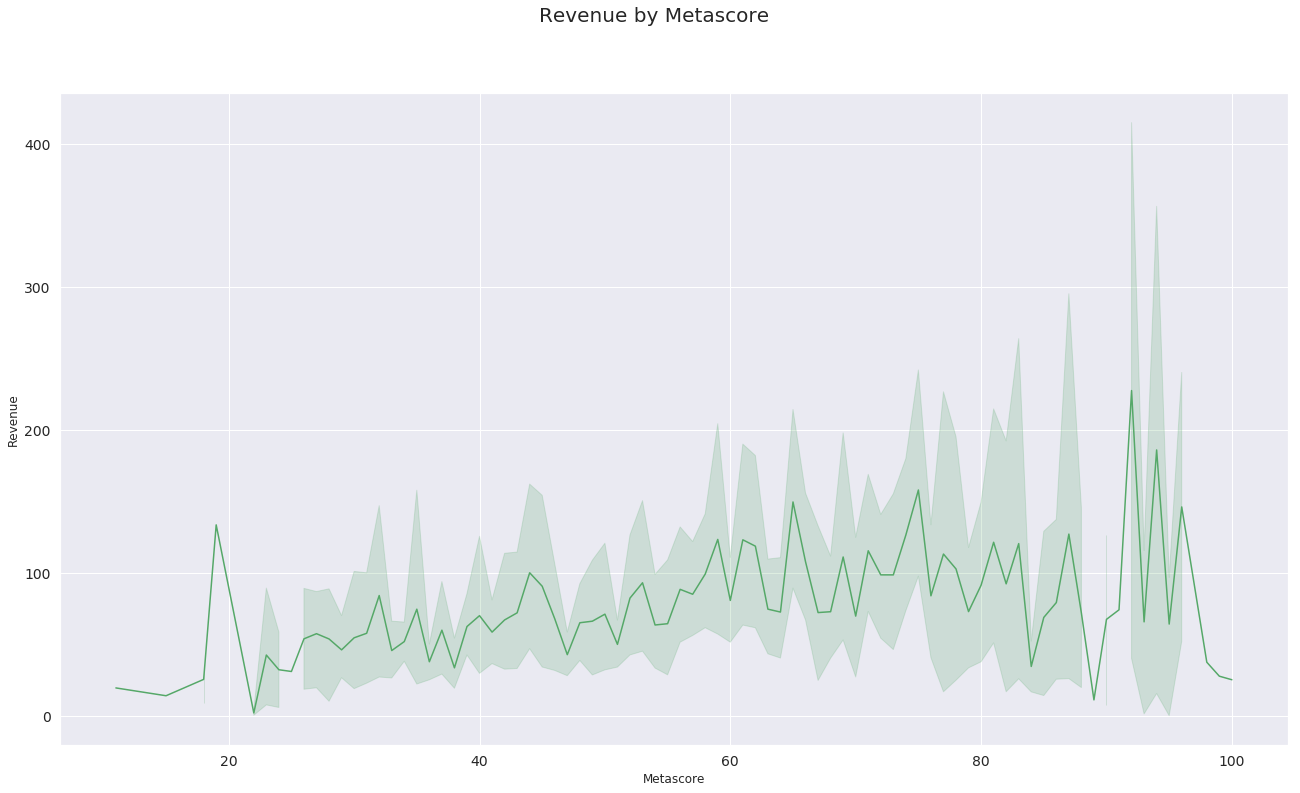

In [15]:
plt.figure(figsize=(22,12))
plt.suptitle('Revenue by Metascore',fontsize=20)
sns.lineplot(data.Metascore,data.Revenue,color='g')
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

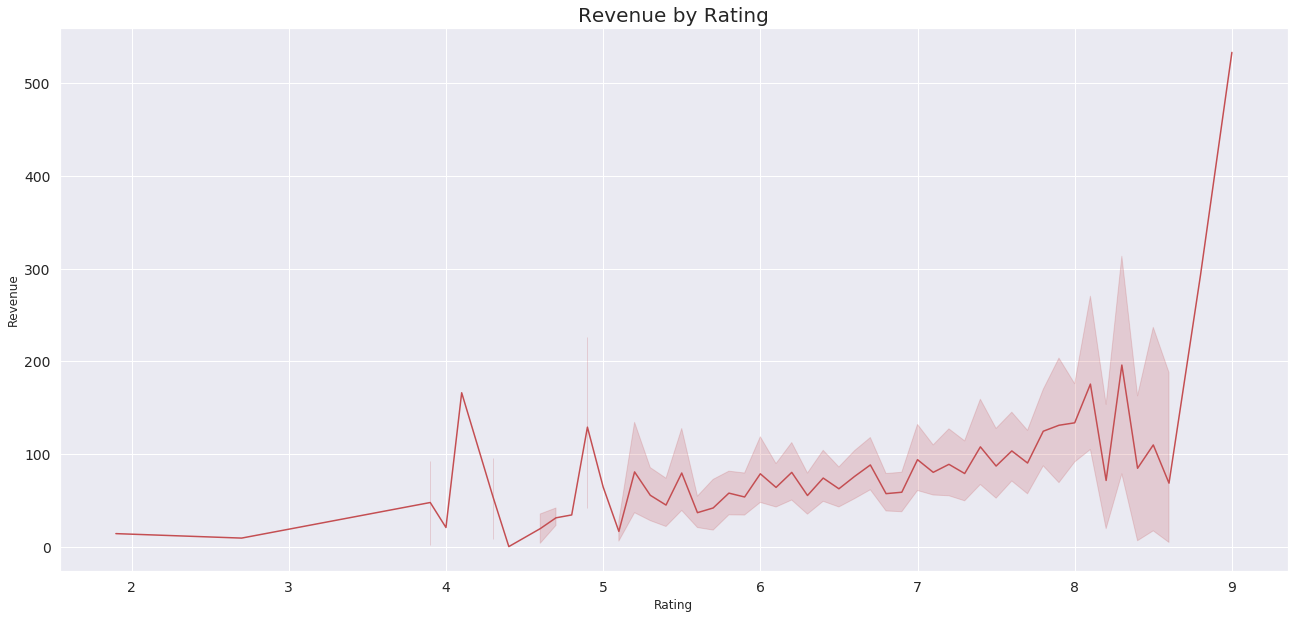

In [16]:
plt.figure(figsize=(22,10))
plt.title('Revenue by Rating',fontsize=20)
sns.lineplot(data.Rating,data.Revenue,color='r')
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

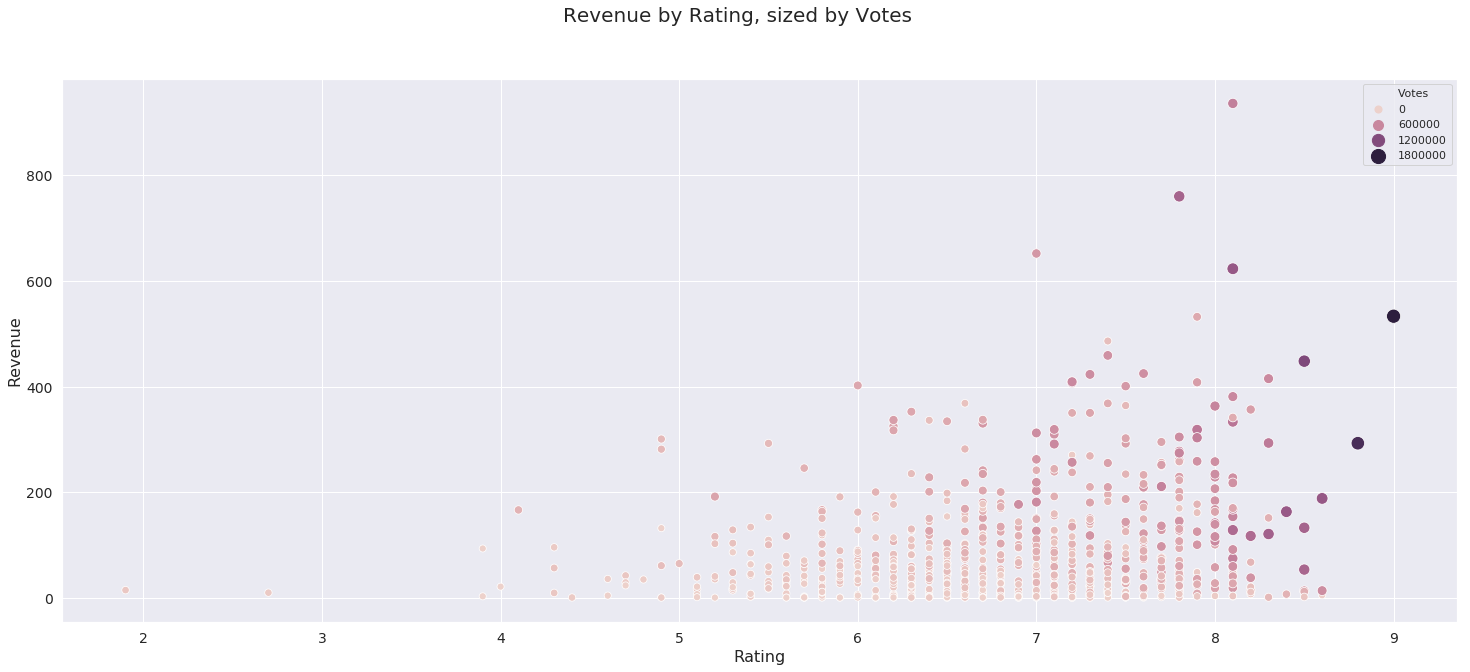

In [17]:
plt.figure(figsize=(25, 10))
plt.suptitle('Revenue by Rating, sized by Votes',fontsize=20)
sns.scatterplot(data.Rating,data.Revenue,hue=data.Votes,size=data.Votes,sizes=(50, 200))
plt.xlabel('Rating',fontsize=16)
plt.ylabel('Revenue',fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

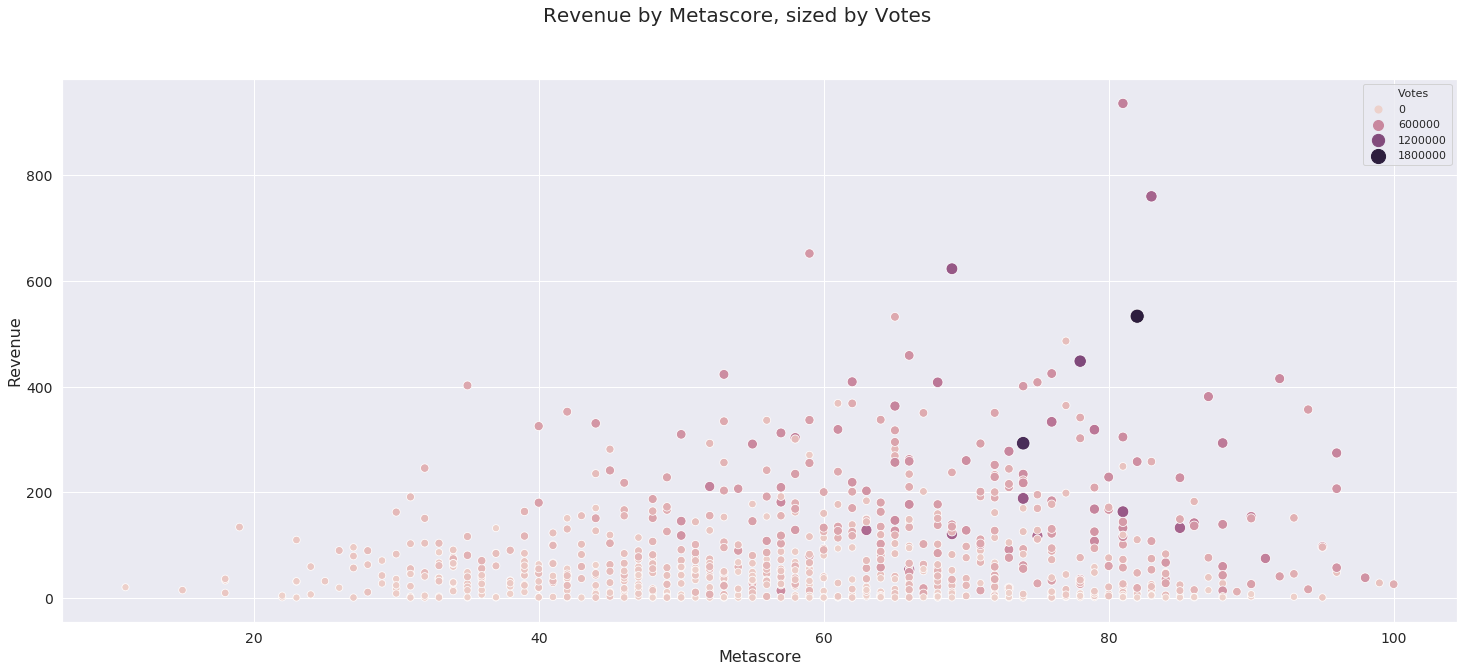

In [18]:
plt.figure(figsize=(25, 10))
plt.suptitle('Revenue by Metascore, sized by Votes',fontsize=20)
sns.scatterplot(data.Metascore,data.Revenue,hue=data.Votes,size=data.Votes,sizes=(50, 200))
plt.xlabel('Metascore',fontsize=16)
plt.ylabel('Revenue',fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

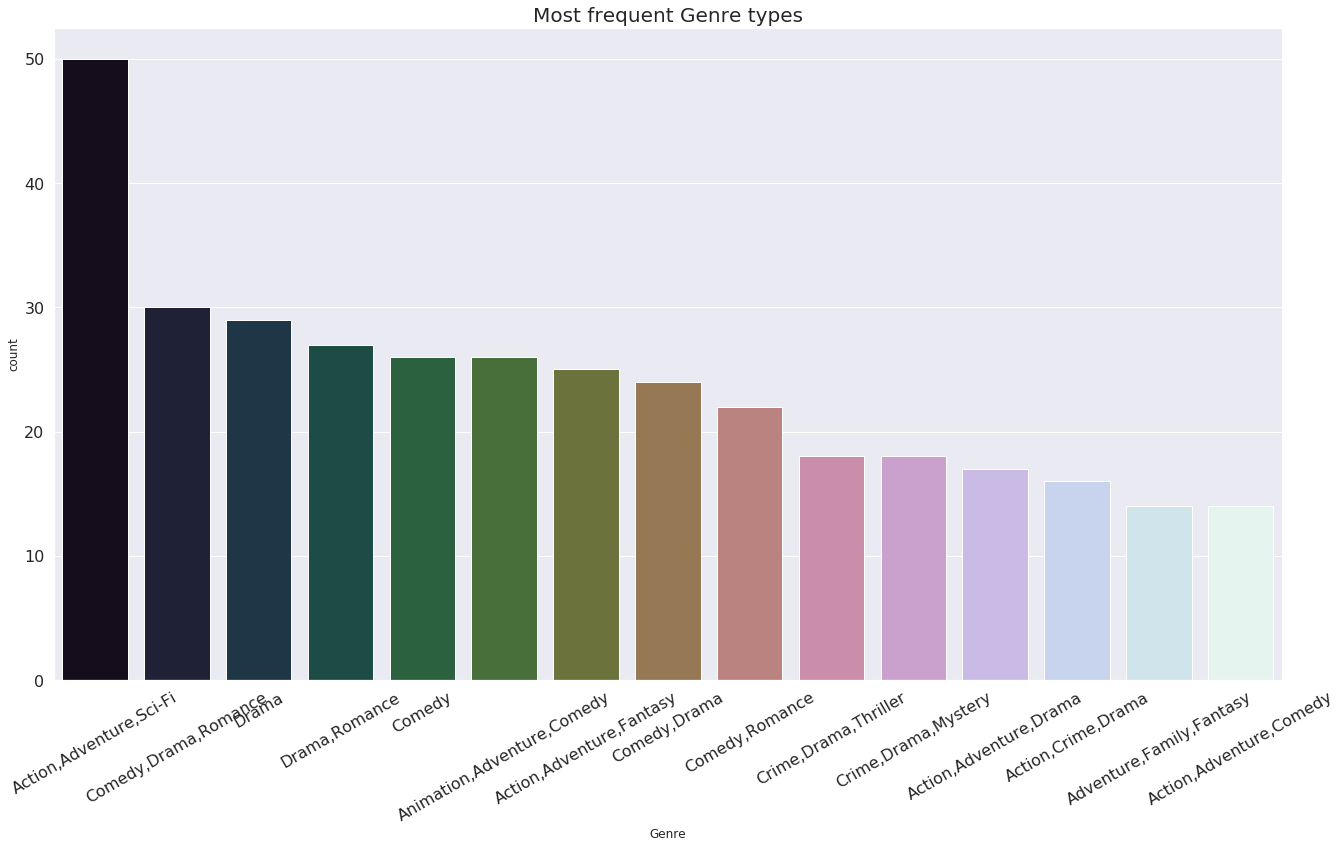

In [19]:
plt.figure(figsize=(22,12))
plt.title('Most frequent Genre types',fontsize=20)
plt.xlabel('Genre')
sns.countplot(data.Genre,order=pd.value_counts(data.Genre).iloc[:15].index,palette=sns.color_palette("cubehelix", 15))
plt.xticks(size=16,rotation=30)
plt.yticks(size=16)
plt.show()

We see that the most frequent movie types are Action,Adventure,Sci-Fi and Drama.

In [20]:
top_genre_groups=data.groupby(['Genre']).sum().sort_values(by='Revenue',ascending=False)[:10]
print('Total values for different Genre groups')
print('-'*60)
print(top_genre_groups[['Rank','Revenue','Metascore']])

Total values for different Genre groups
------------------------------------------------------------
                             Rank   Revenue  Metascore
Genre                                                 
Action,Adventure,Sci-Fi     16615  10461.51     2756.0
Animation,Adventure,Comedy  11045   5754.75     1787.0
Action,Adventure,Fantasy     8914   5227.02     1223.0
Adventure,Family,Fantasy     5838   2201.47      787.0
Comedy                      13131   1941.81     1200.0
Action,Adventure,Thriller    5472   1739.36      693.0
Animation,Action,Adventure   5174   1651.75      561.0
Action,Adventure,Drama       7784   1385.29      908.0
Adventure,Drama,Fantasy      3045   1380.04      321.0
Action,Crime,Drama           7194   1346.10      834.0


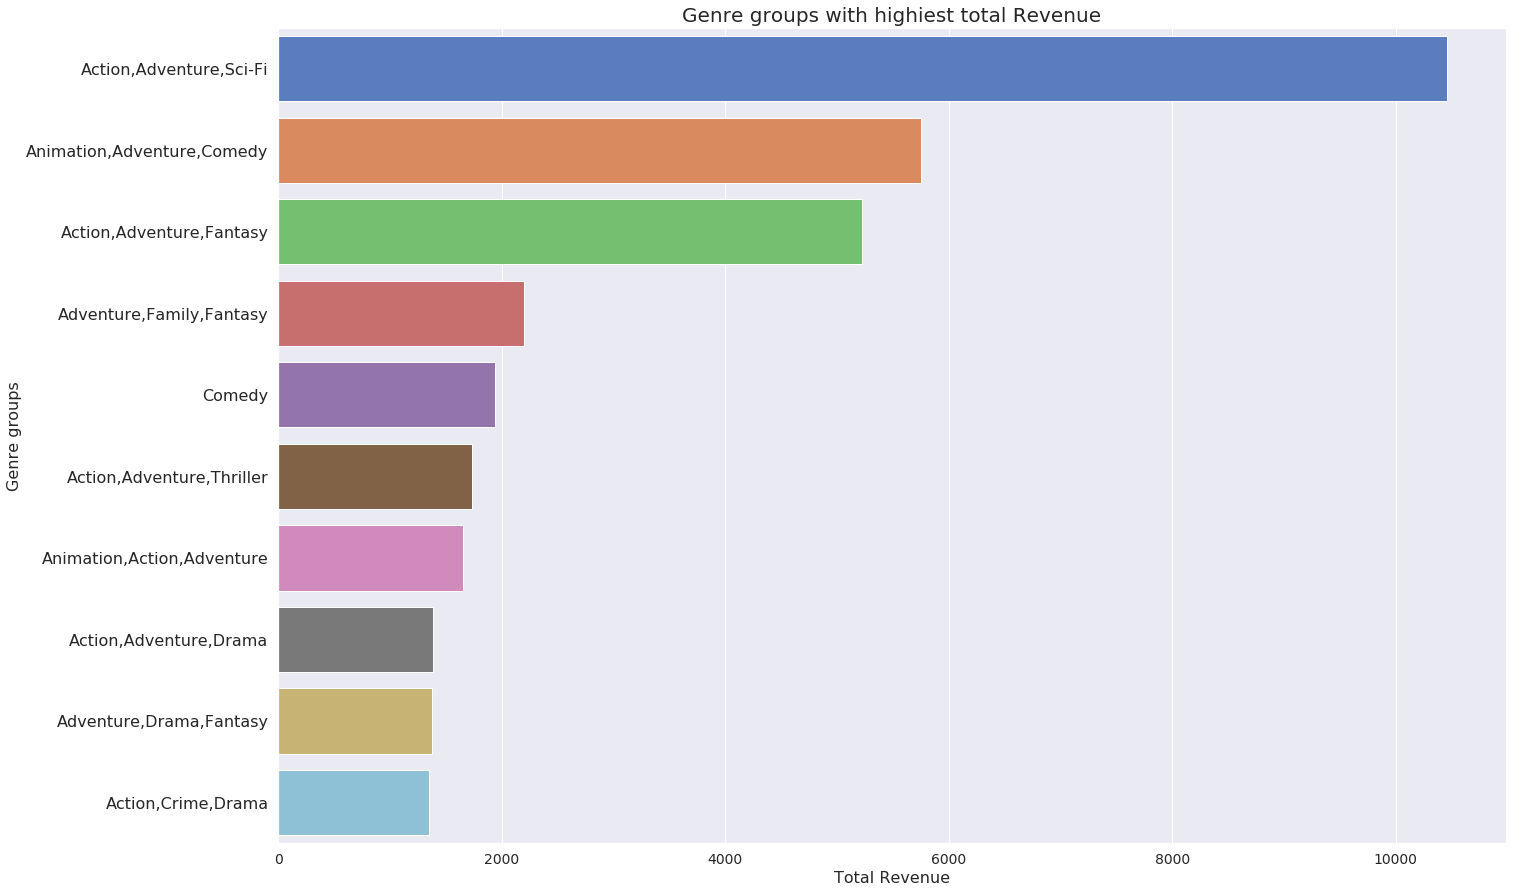

In [21]:
plt.figure(figsize=(22,15))
plt.title('Genre groups with highiest total Revenue',fontsize=20)
sns.barplot(top_genre_groups.Revenue,top_genre_groups.index,palette=sns.color_palette("muted", 20))
plt.ylabel('Genre groups',fontsize=16)
plt.xlabel('Total Revenue',fontsize=16)
plt.xticks(size=14)
plt.yticks(size=16)
plt.show()

In [22]:
genres=list(genre.split(',') for genre in data.Genre)
genres=list(itertools.chain.from_iterable(genres))
genres=pd.value_counts(genres)
print('There are ',len(genres), 'different Genres in the dataset:')
print('-'*50)
print(genres)

There are  20 different Genres in the dataset:
--------------------------------------------------
Drama        419
Action       277
Comedy       250
Adventure    244
Thriller     148
Crime        126
Romance      120
Sci-Fi       107
Fantasy       92
Horror        87
Mystery       86
Biography     67
Family        48
Animation     45
History       25
Sport         15
Music         15
War           10
Musical        5
Western        4
dtype: int64


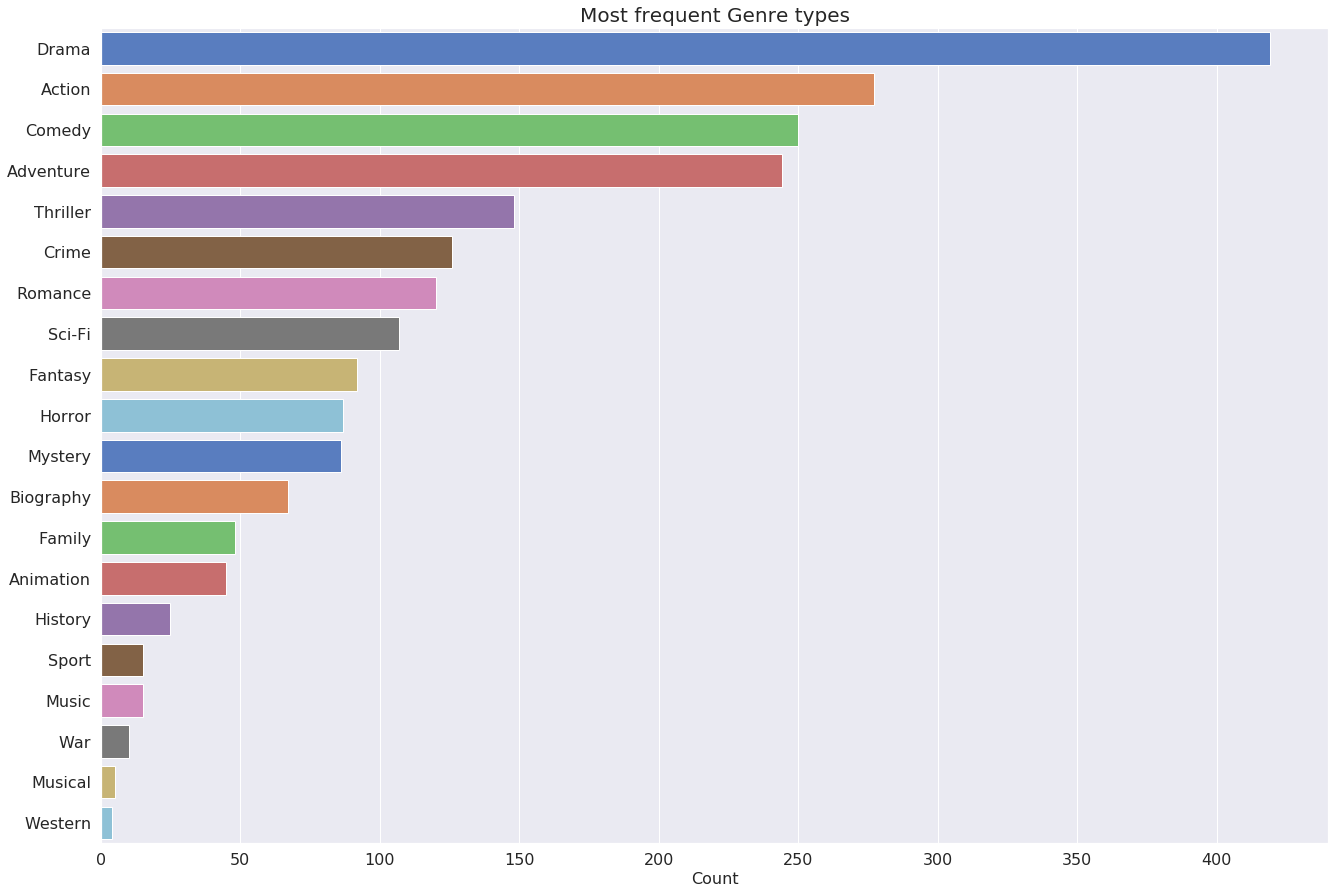

In [23]:
plt.figure(figsize=(22,15))
plt.title('Most frequent Genre types',fontsize=20)
plt.xlabel('Count',fontsize=16)
sns.barplot(genres.values,genres.index,palette=sns.color_palette("muted", 20))
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

<h3><b>Actors & Directors:</b></h3>

In [24]:
print('-'*30)
print('Top actors')
print('-'*30)
print(pd.value_counts(actors)[:10])

------------------------------
Top actors
------------------------------
Mark Wahlberg         15
Hugh Jackman          14
Brad Pitt             13
Anne Hathaway         12
Christian Bale        12
Scarlett Johansson    12
Robert Downey Jr.     12
Tom Hardy             11
Jake Gyllenhaal       11
Michael Fassbender    11
dtype: int64


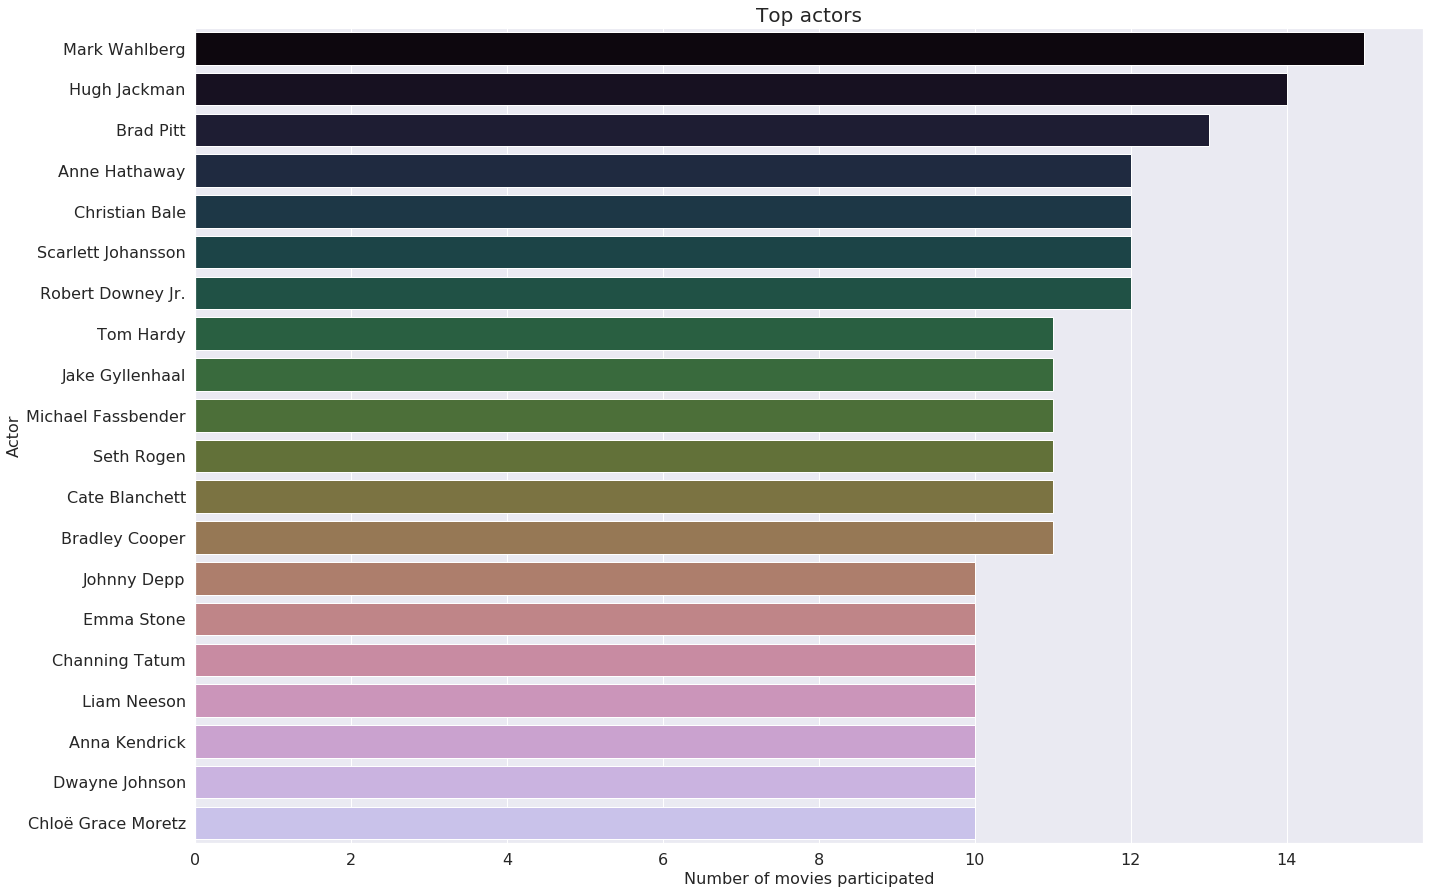

In [25]:
plt.figure(figsize=(22,15))
plt.title('Top actors',fontsize=20)
plt.ylabel('Actor',fontsize=16)
plt.xlabel('Number of movies participated',fontsize=16)
sns.barplot(actors_count.values,actors_count.index,order=actors_count[:20].index,palette=sns.color_palette("cubehelix", 25))
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

In [26]:
print('-'*80)
print('Top Directors in terms of total movies directed:')
print('-'*80)
print(pd.value_counts(data.Director)[:10])

--------------------------------------------------------------------------------
Top Directors in terms of total movies directed:
--------------------------------------------------------------------------------
Ridley Scott          8
David Yates           6
Paul W.S. Anderson    6
Michael Bay           6
Christopher Nolan     5
M. Night Shyamalan    5
Denis Villeneuve      5
Justin Lin            5
Danny Boyle           5
Martin Scorsese       5
Name: Director, dtype: int64


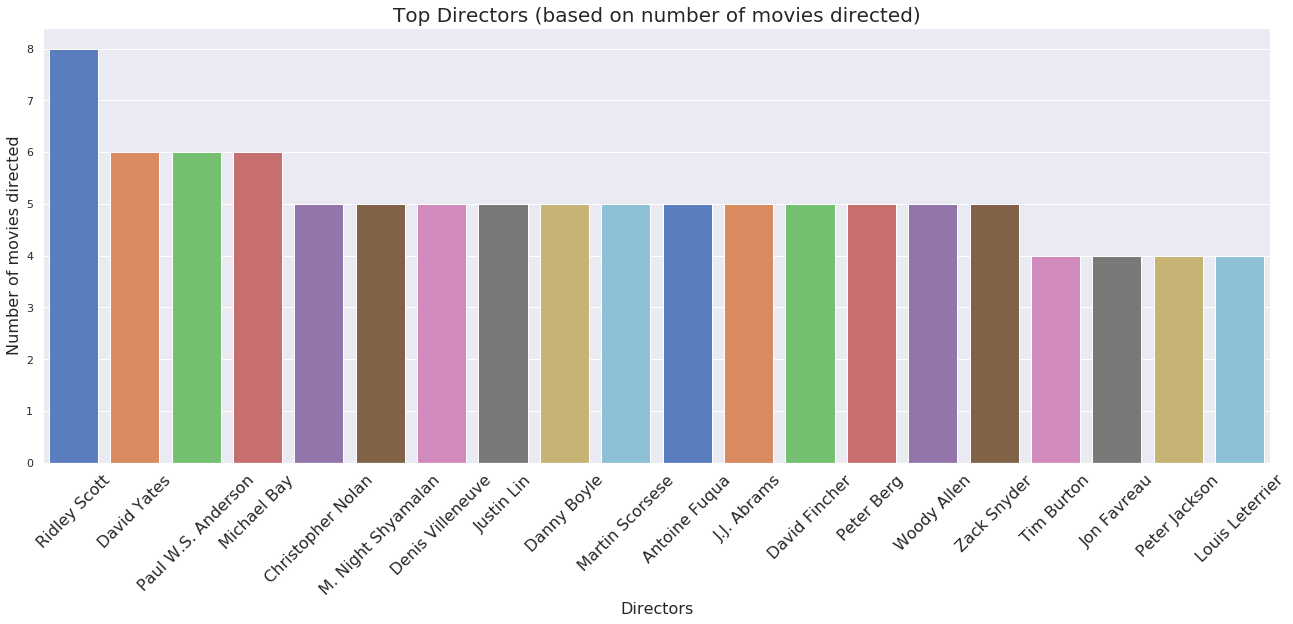

In [27]:
plt.figure(figsize=(22,8))
plt.title('Top Directors (based on number of movies directed)',fontsize=20)
sns.countplot(data.Director,order=pd.value_counts(data.Director)[:20].index,palette=sns.color_palette("muted", 20))
plt.xlabel('Directors',fontsize=16)
plt.ylabel('Number of movies directed',fontsize=16)
plt.xticks(size=16,rotation=45)
plt.show()

Now we will create a dataframe containing the name of the director, the mean rating of all the movies he directed and also the mean metascore his movies got. Since many directors have only one movie directed, the mean values isn't a good indicator of their work. So we will pick only the directors ( and later the actors ) who directed at least 4 movies.

In [28]:
top_directors=pd.DataFrame(columns=['director','mean_rating','mean_metascore'])
for director in data.Director.unique():
    #print(" %30s,   Mean Rating: %8.2f ,   Mean Metascore: %8.2f" % (director,data.Rating[data.Director==director].values.mean(),data.Metascore[data.Director==director].values.mean()))
    if len(data[data.Director==director].values)>=4:
        mean_rating=data.Rating[data.Director==director].values.mean()
        mean_metascore=data.Metascore[data.Director==director].values.mean()
        top_directors=top_directors.append( {'director': director ,
                           'mean_rating': mean_rating,
                           'mean_metascore':mean_metascore} , ignore_index=True)

top_directors=top_directors.sort_values(by=['mean_rating','mean_metascore'],ascending=False).reset_index(drop=True)
print(top_directors.head())

            director  mean_rating  mean_metascore
0  Christopher Nolan        8.680           74.80
1    Martin Scorsese        7.920           77.00
2      David Fincher        7.820           78.60
3   Denis Villeneuve        7.760           75.60
4     Matthew Vaughn        7.725           63.75


In [29]:
print('-'*80)
print('Best Directors based on mean Rating and Metascore (at least 4 movies directed)')
print('-'*80)
print(top_directors.head())
print('-'*80)
print('Worst Directors based on mean Rating and Metascore (at least 4 movies directed)')
print('-'*80)
print(top_directors.tail())
print('-'*80)

--------------------------------------------------------------------------------
Best Directors based on mean Rating and Metascore (at least 4 movies directed)
--------------------------------------------------------------------------------
            director  mean_rating  mean_metascore
0  Christopher Nolan        8.680           74.80
1    Martin Scorsese        7.920           77.00
2      David Fincher        7.820           78.60
3   Denis Villeneuve        7.760           75.60
4     Matthew Vaughn        7.725           63.75
--------------------------------------------------------------------------------
Worst Directors based on mean Rating and Metascore (at least 4 movies directed)
--------------------------------------------------------------------------------
              director  mean_rating  mean_metascore
29         Michael Bay     6.483333       43.833333
30           Paul Feig     6.450000       67.500000
31        Dennis Dugan     5.825000       34.000000
32  M. Ni

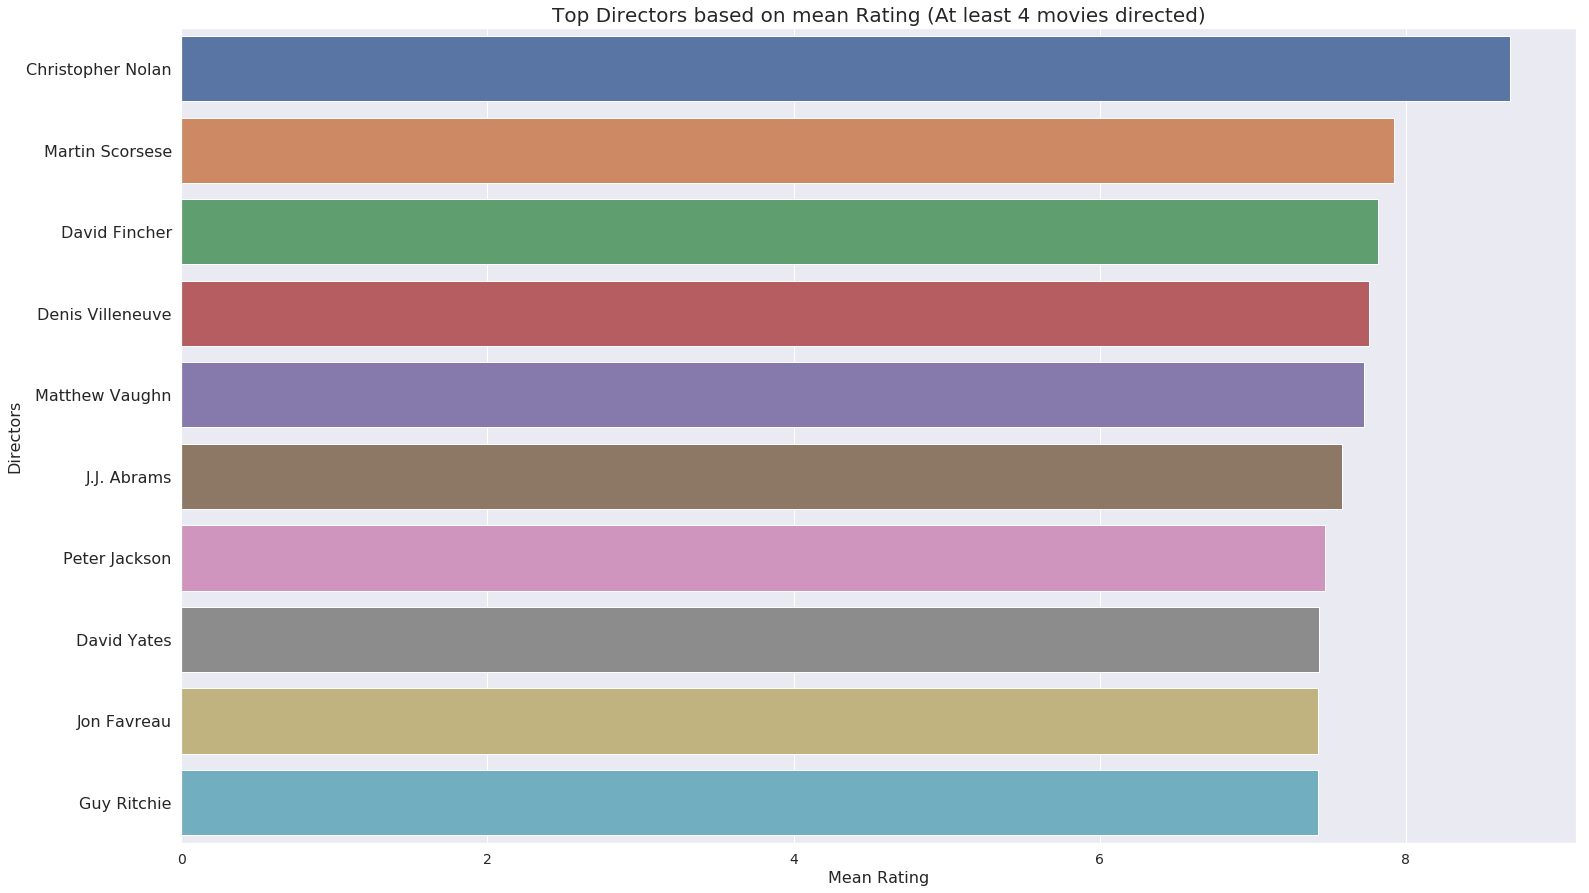

In [30]:
plt.figure(figsize=(25, 15))
plt.title('Top Directors based on mean Rating (At least 4 movies directed)',fontsize=20)
sns.barplot(top_directors.mean_rating[:10],top_directors.director[:10])
plt.xticks(size=14)
plt.yticks(size=16)
plt.xlabel('Mean Rating',fontsize=16)
plt.ylabel('Directors',fontsize=16)
plt.show()

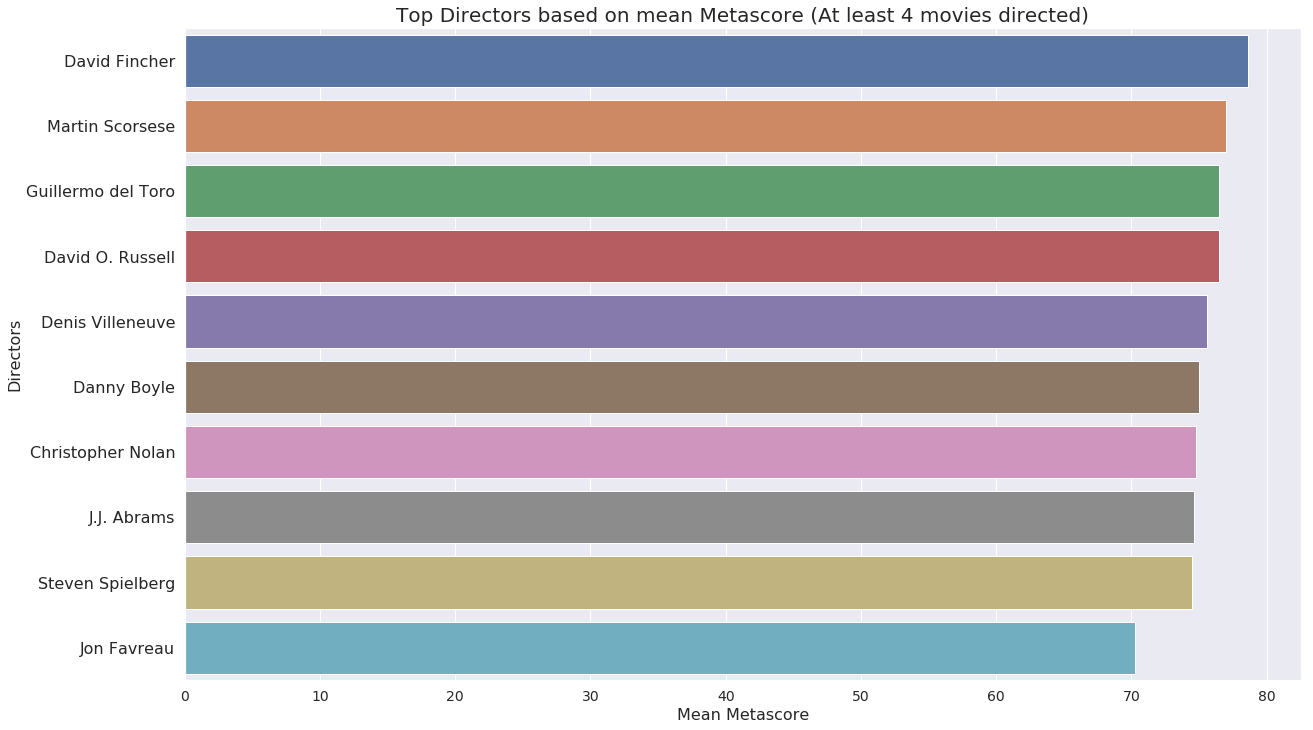

In [31]:
plt.figure(figsize=(20, 12))
plt.title('Top Directors based on mean Metascore (At least 4 movies directed)',fontsize=20)
sns.barplot(top_directors.sort_values(['mean_metascore'],ascending=False).mean_metascore[:10],top_directors.sort_values(['mean_metascore'],ascending=False).director[:10])
plt.xticks(size=14)
plt.yticks(size=16)
plt.xlabel('Mean Metascore',fontsize=16)
plt.ylabel('Directors',fontsize=16)
plt.show()

Lets do the same for the actors.

In [32]:
top_actors=pd.DataFrame(columns=['actor','mean_rating','mean_metascore'])
for actor in pd.value_counts(actors).index:
    if len(data[data.Actors.str.contains(actor)].values)>=4:
        mean_rating=data.Rating[data.Actors.str.contains(actor)].values.mean()
        mean_metascore=data.Metascore[data.Actors.str.contains(actor)].values.mean()
        #print(actor,mean_rating,mean_metascore)
        top_actors=top_actors.append( {'actor': actor ,
                           'mean_rating': mean_rating,
                           'mean_metascore':mean_metascore} , ignore_index=True)

top_actors=top_actors.sort_values(by=['mean_rating','mean_metascore'],ascending=False).reset_index(drop=True)
print(top_actors[:10])

                  actor  mean_rating  mean_metascore
0     Leonardo DiCaprio     7.970000       69.900000
1         Michael Caine     7.766667       68.500000
2      Domhnall Gleeson     7.716667       72.666667
3          Rupert Grint     7.700000       75.250000
4        Rachel McAdams     7.671429       66.142857
5   Christopher Plummer     7.625000       75.000000
6        Martin Freeman     7.620000       69.000000
7  Benedict Cumberbatch     7.600000       71.250000
8          Ian McKellen     7.583333       61.500000
9        Zachary Quinto     7.550000       70.000000


In [33]:
print('-'*80)
print('Best Actors based on Rating and Metascore, participated in at least 4 movies')
print('-'*80)
print(top_actors.head())
print('-'*80)
print('Worst Actors based on Rating and Metascore,participated in at least 4 movies')
print('-'*80)
print(top_actors.tail())
print('-'*80)

--------------------------------------------------------------------------------
Best Actors based on Rating and Metascore, participated in at least 4 movies
--------------------------------------------------------------------------------
               actor  mean_rating  mean_metascore
0  Leonardo DiCaprio     7.970000       69.900000
1      Michael Caine     7.766667       68.500000
2   Domhnall Gleeson     7.716667       72.666667
3       Rupert Grint     7.700000       75.250000
4     Rachel McAdams     7.671429       66.142857
--------------------------------------------------------------------------------
Worst Actors based on Rating and Metascore,participated in at least 4 movies
--------------------------------------------------------------------------------
               actor  mean_rating  mean_metascore
235  Kate Beckinsale       5.7800           44.60
236    Penélope Cruz       5.7500           45.25
237  Kristen Stewart       5.7125           56.50
238   Milla Jovovich  

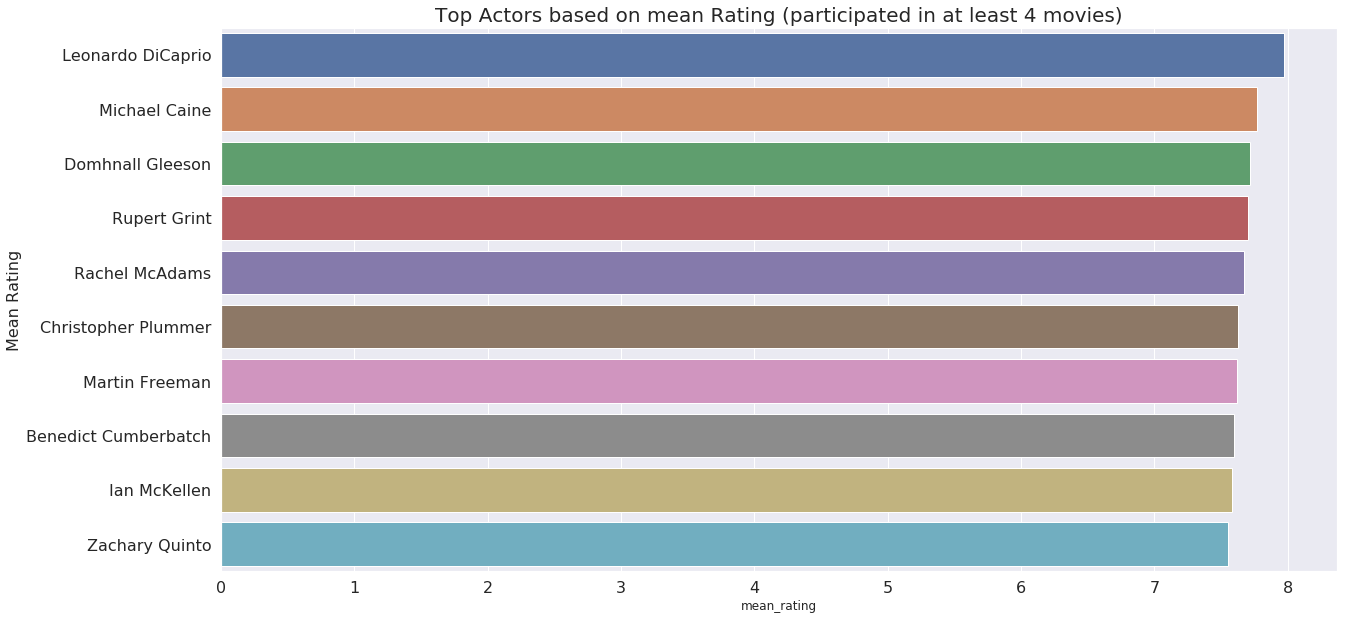

In [34]:
plt.figure(figsize=(20, 10))
plt.title('Top Actors based on mean Rating (participated in at least 4 movies)',fontsize=20)
sns.barplot(top_actors.mean_rating[:10],top_actors.actor[:10])
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel('Actor',fontsize=16)
plt.ylabel('Mean Rating',fontsize=16)
plt.show()

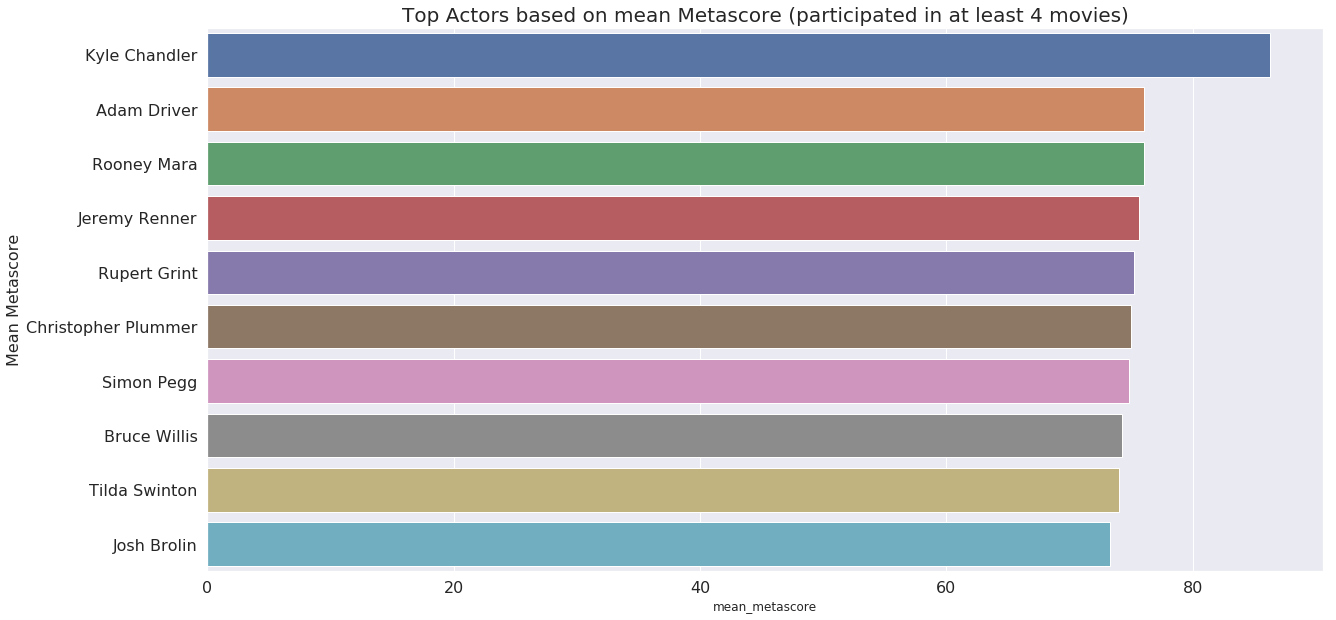

In [35]:
plt.figure(figsize=(20, 10))
plt.title('Top Actors based on mean Metascore (participated in at least 4 movies)',fontsize=20)
sns.barplot(top_actors.sort_values(['mean_metascore'],ascending=False).mean_metascore[:10],top_actors.sort_values(['mean_metascore'],ascending=False).actor[:10])
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel('Actor',fontsize=16)
plt.ylabel('Mean Metascore',fontsize=16)
plt.show()

Now lets see the Revenue,Ranking and Metascore values during the years of the data.

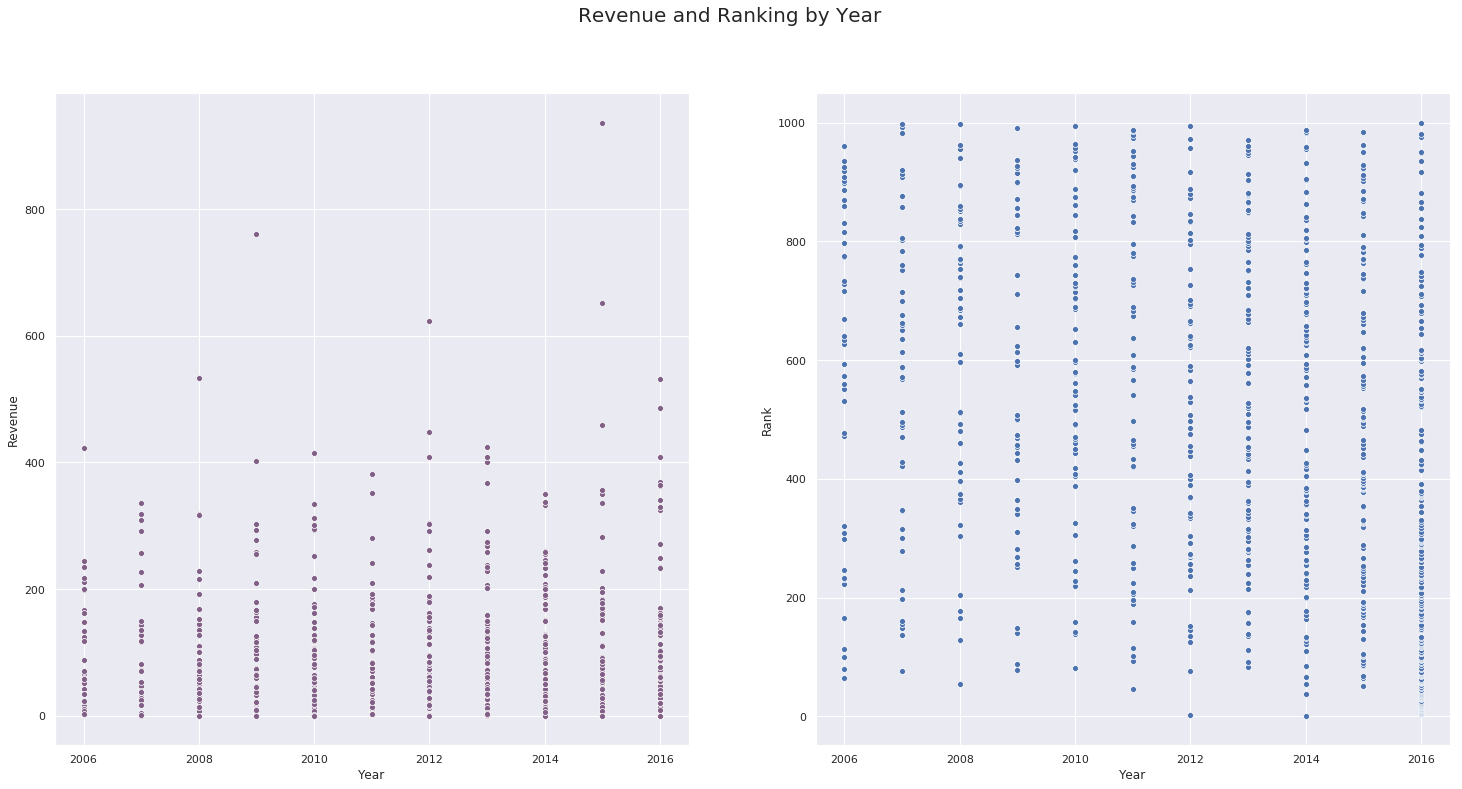

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(25, 12))
plt.suptitle('Revenue and Ranking by Year',fontsize=20)
sns.scatterplot(data.Year,data.Revenue,ax=axs[0],color=sns.xkcd_rgb["dusty purple"])
sns.scatterplot(data.Year,data.Rank,ax=axs[1])
plt.show()

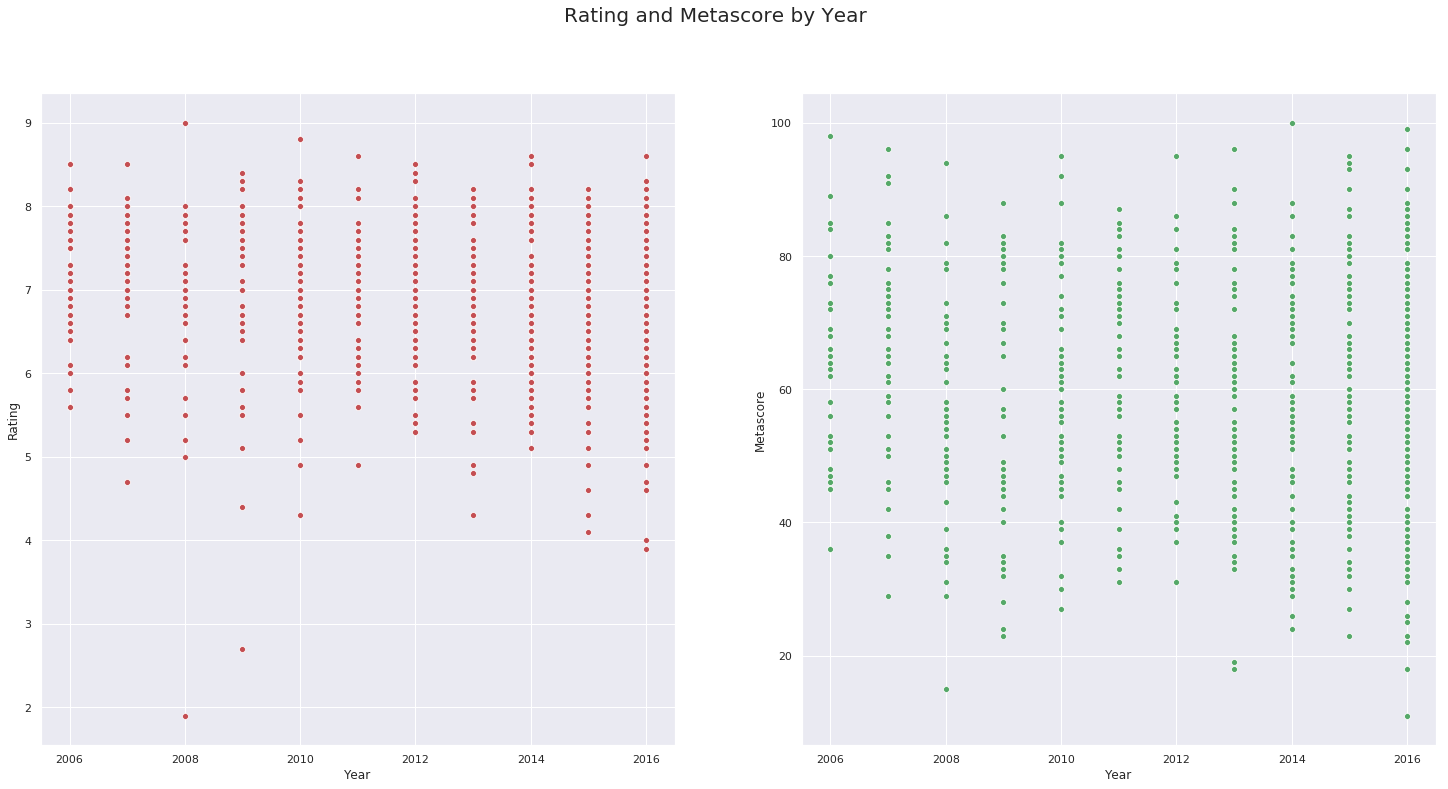

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(25, 12))
plt.suptitle('Rating and Metascore by Year',fontsize=20)
sns.scatterplot(data.Year,data.Rating,ax=axs[0],color='r')
sns.scatterplot(data.Year,data.Metascore,ax=axs[1],color='g')
plt.show()

In [38]:
top_revenues=data.sort_values('Revenue',ascending=False).reset_index(drop=True)[:10]

In [39]:
print('-'*100)
print('Best selling movies (Revenue in millions)')
print('-'*100)
print(top_revenues[['Title','Revenue']])

----------------------------------------------------------------------------------------------------
Best selling movies (Revenue in millions)
----------------------------------------------------------------------------------------------------
                                        Title  Revenue
0  Star Wars: Episode VII - The Force Awakens   936.63
1                                      Avatar   760.51
2                              Jurassic World   652.18
3                                The Avengers   623.28
4                             The Dark Knight   533.32
5                                   Rogue One   532.17
6                                Finding Dory   486.29
7                     Avengers: Age of Ultron   458.99
8                       The Dark Knight Rises   448.13
9             The Hunger Games: Catching Fire   424.65


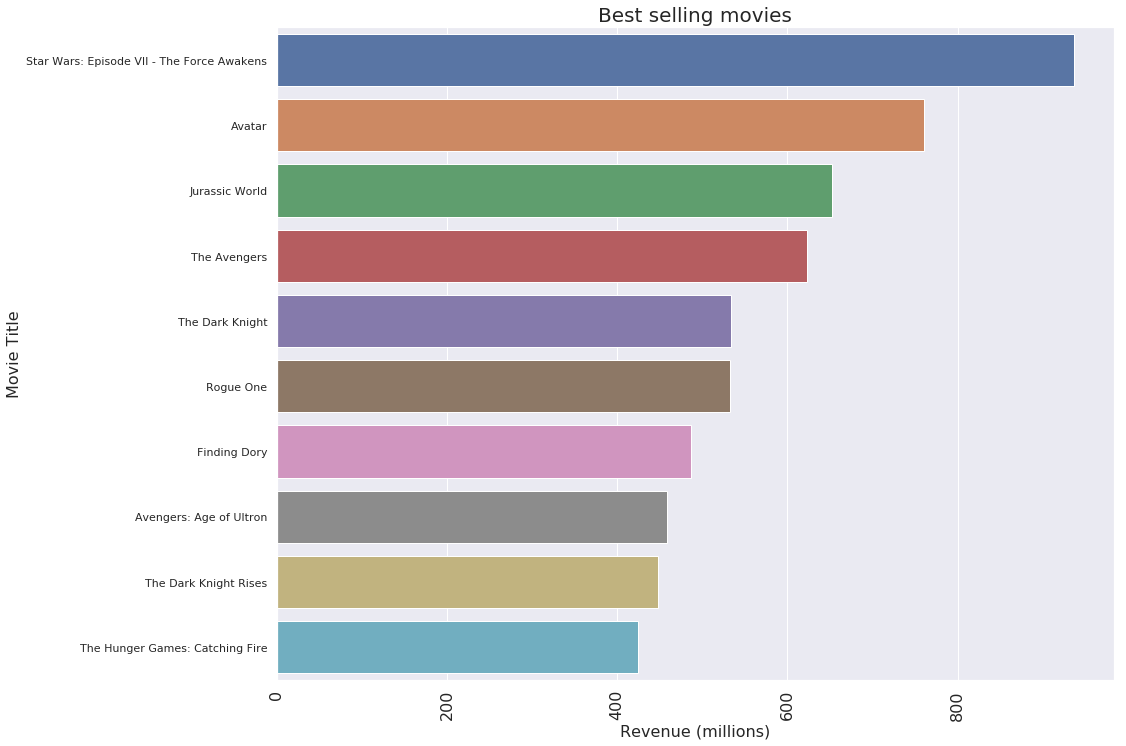

In [40]:
plt.figure(figsize=(15,12))
plt.title('Best selling movies',fontsize=20)
sns.barplot('Revenue','Title',data=top_revenues)
plt.ylabel('Movie Title',fontsize=16)
plt.xlabel('Revenue (millions)',fontsize=16)
plt.xticks(size=16,rotation=90)
plt.show()

In [41]:

best_rated_movies=data.sort_values('Rating',ascending=False).reset_index(drop=True)[:10]
print('-'*100)
print('Top rated movies')
print('-'*100)
print(best_rated_movies[['Title','Rating']])

----------------------------------------------------------------------------------------------------
Top rated movies
----------------------------------------------------------------------------------------------------
                   Title  Rating
0        The Dark Knight     9.0
1              Inception     8.8
2           Interstellar     8.6
3       The Intouchables     8.6
4          Kimi no na wa     8.6
5  The Dark Knight Rises     8.5
6       Taare Zameen Par     8.5
7               Whiplash     8.5
8           The Departed     8.5
9    The Lives of Others     8.5


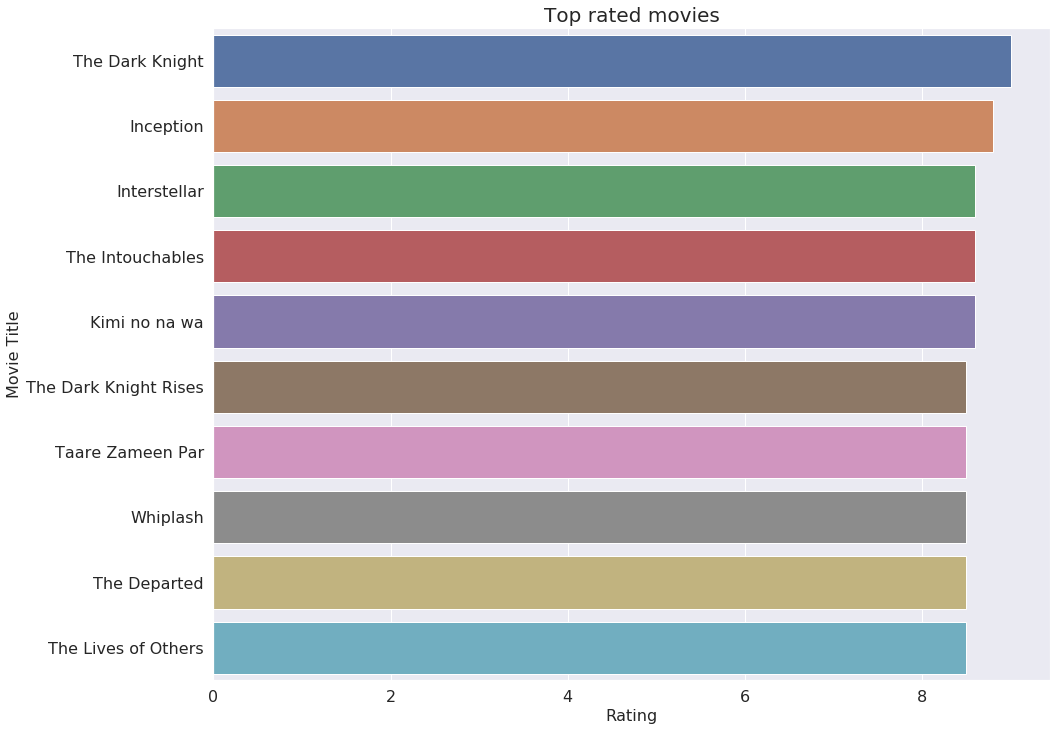

In [42]:
plt.figure(figsize=(15,12))
plt.title('Top rated movies',fontsize=20)
sns.barplot('Rating','Title',data=best_rated_movies)
plt.ylabel('Movie Title',fontsize=16)
plt.xlabel('Rating',fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

In [43]:
top_voted_movies=data.sort_values('Votes',ascending=False).reset_index(drop=True)[:10]
print('-'*100)
print('Top voted movies')
print('-'*100)
print(top_voted_movies[['Title','Votes']][:10])

----------------------------------------------------------------------------------------------------
Top voted movies
----------------------------------------------------------------------------------------------------
                   Title    Votes
0        The Dark Knight  1791916
1              Inception  1583625
2  The Dark Knight Rises  1222645
3           Interstellar  1047747
4           The Avengers  1045588
5       Django Unchained  1039115
6   Inglourious Basterds   959065
7           The Departed   937414
8                 Avatar   935408
9           The Prestige   913152


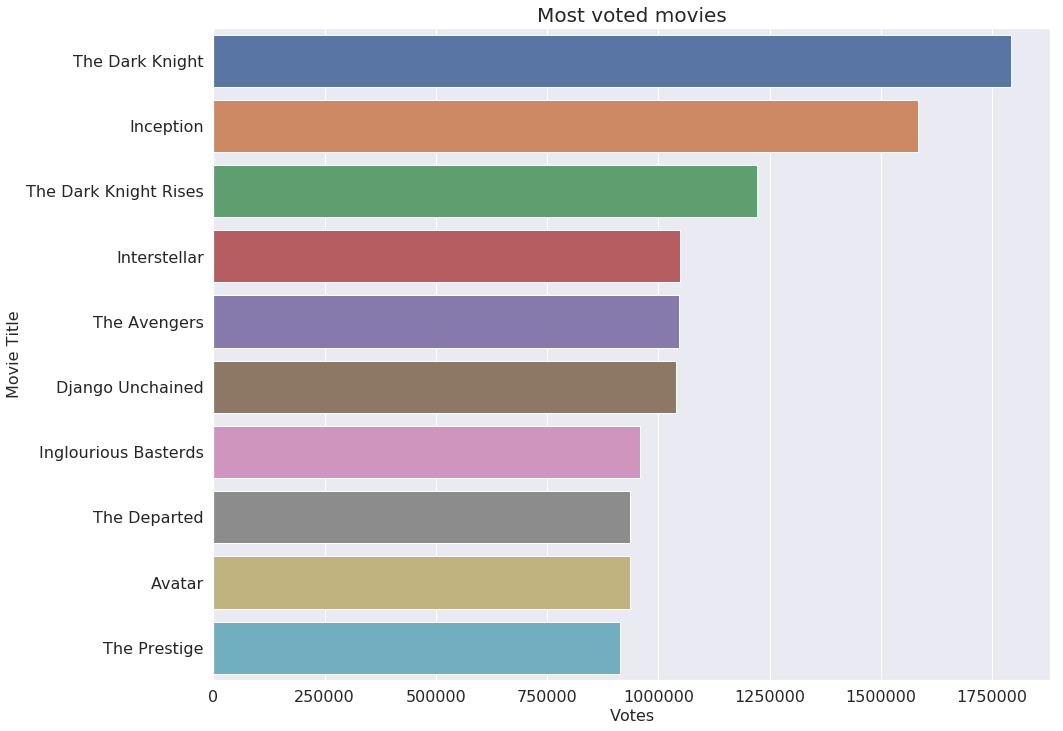

In [44]:
plt.figure(figsize=(15,12))
plt.title('Most voted movies',fontsize=20)
sns.barplot('Votes','Title',data=top_voted_movies)
plt.ylabel('Movie Title',fontsize=16)
plt.xlabel('Votes',fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

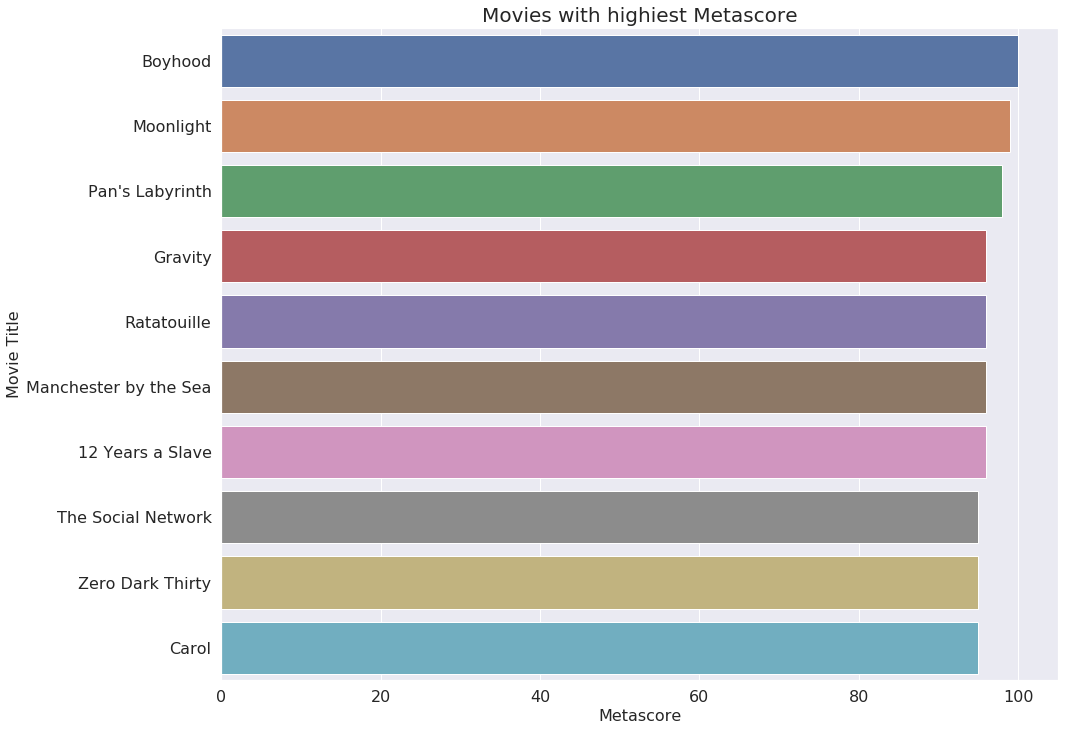

In [45]:
best_metascore=data.sort_values('Metascore',ascending=False).reset_index(drop=True)[:10]
plt.figure(figsize=(15,12))
sns.barplot('Metascore','Title',data=best_metascore)
plt.title('Movies with highiest Metascore',fontsize=20)
plt.ylabel('Movie Title',fontsize=16)
plt.xlabel('Metascore',fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

In [46]:
print('-'*100)
print('Movies with highiest Metascore')
print('-'*100)
print(best_metascore[['Title','Metascore']])

----------------------------------------------------------------------------------------------------
Movies with highiest Metascore
----------------------------------------------------------------------------------------------------
                   Title  Metascore
0                Boyhood      100.0
1              Moonlight       99.0
2        Pan's Labyrinth       98.0
3                Gravity       96.0
4            Ratatouille       96.0
5  Manchester by the Sea       96.0
6       12 Years a Slave       96.0
7     The Social Network       95.0
8       Zero Dark Thirty       95.0
9                  Carol       95.0


**Interesting(or funny) facts for the movie lovers:**<br>
*  'Boyhood'(rank=657) has a perfect metascore of 100 thus making it the best metascored movie in these 10 years. <br>
*  'Gravity'(rank=510) is 4th in order having a great Metascore 96 while  'The Avengers'(rank=77) has a mediocre Metascore of 69 .<br>
*  'Carol'(rank=502) has a metascore of 95 while 'The Dark Knight'(rank=55) has a metascore of 82.<br>


We continue by taking a better look between the Ranking of the movies and other feutures.

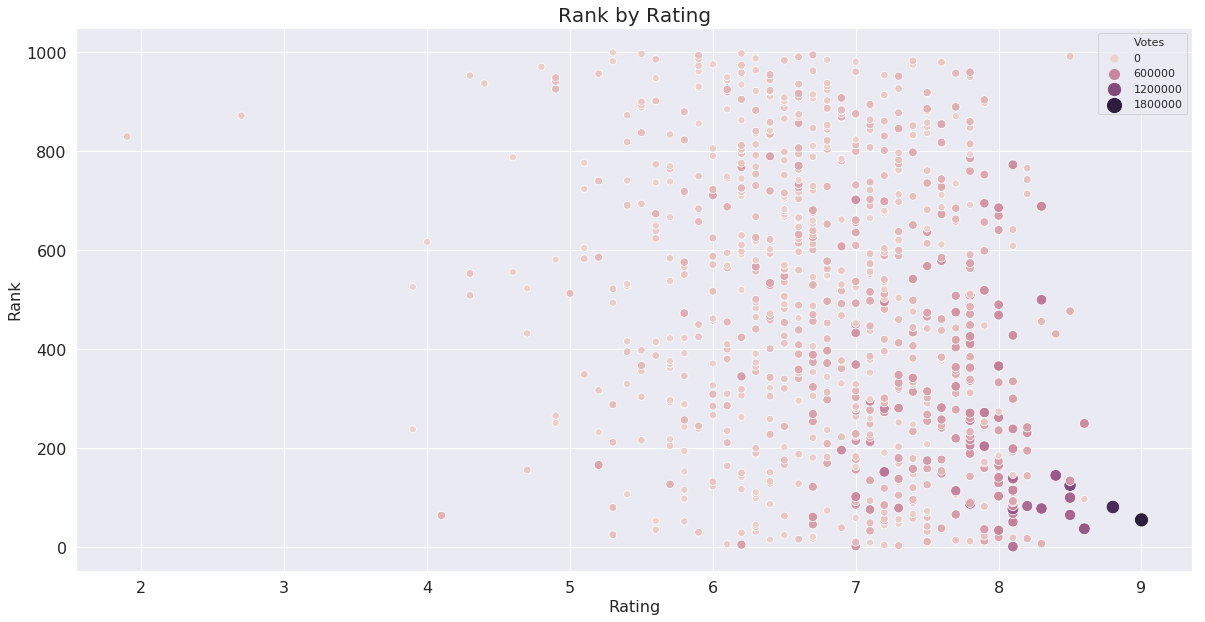

In [47]:
plt.figure(figsize=(20, 10))
plt.title('Rank by Rating',fontsize=20)
sns.scatterplot('Rating','Rank',hue='Votes',size='Votes',data=data,sizes=(50, 200))
plt.ylabel('Rank',fontsize=16)
plt.xlabel('Rating',fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()


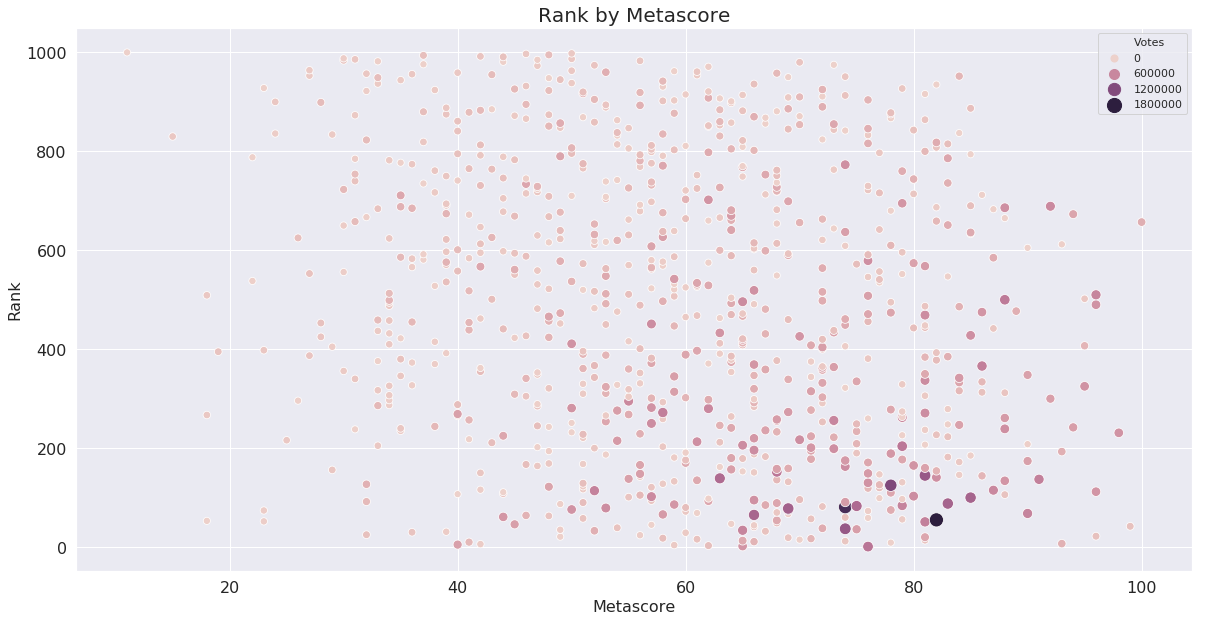

In [48]:
plt.figure(figsize=(20, 10))
plt.title('Rank by Metascore',fontsize=20)
sns.scatterplot('Metascore','Rank',hue='Votes',size='Votes',data=data,sizes=(50, 200))
plt.ylabel('Rank',fontsize=16)
plt.xlabel('Metascore',fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

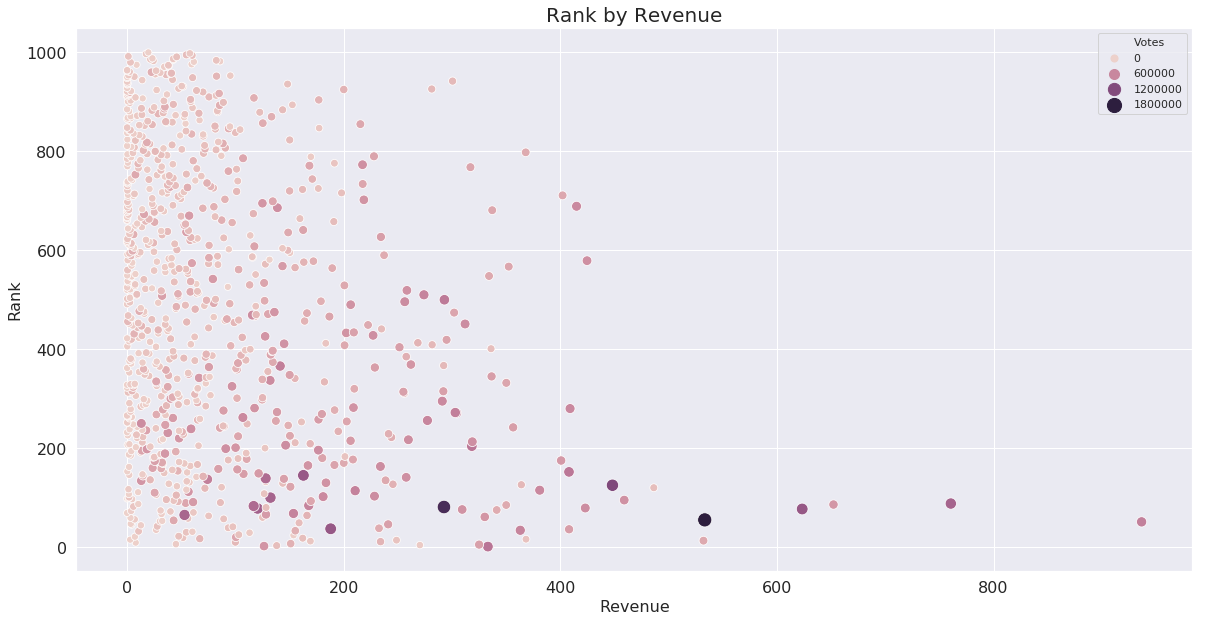

In [49]:
plt.figure(figsize=(20, 10))
plt.title('Rank by Revenue',fontsize=20)
sns.scatterplot('Revenue','Rank',hue='Votes',size='Votes',data=data,sizes=(50, 200))
plt.ylabel('Rank',fontsize=16)
plt.xlabel('Revenue',fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

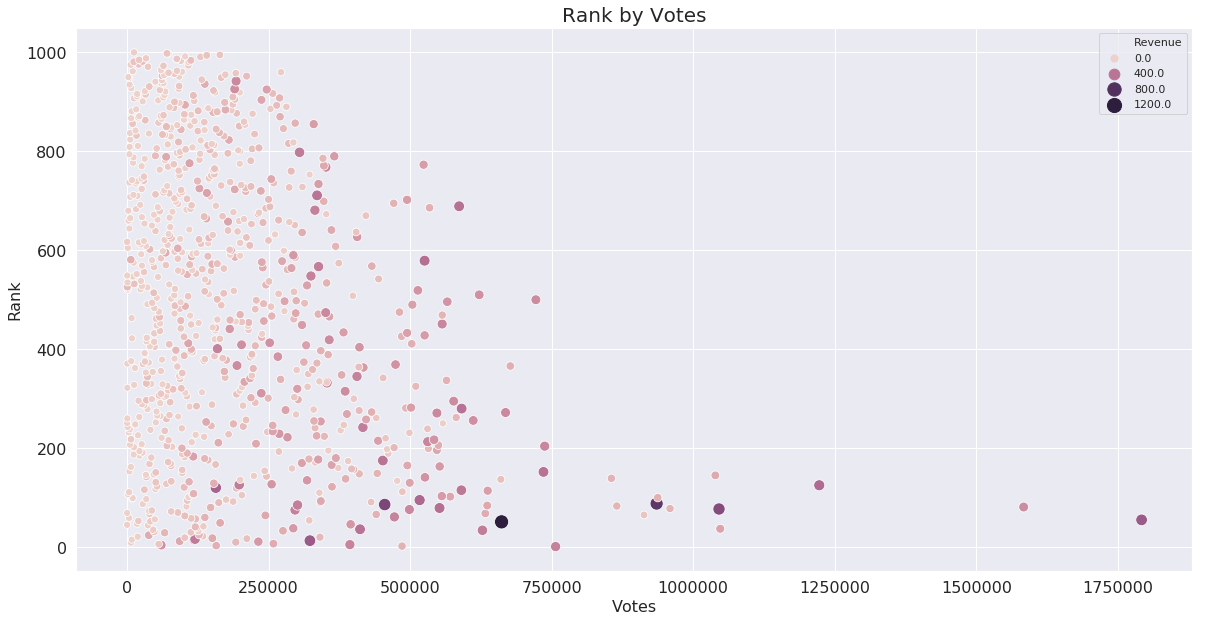

In [50]:
plt.figure(figsize=(20, 10))
plt.title('Rank by Votes',fontsize=20)
sns.scatterplot('Votes','Rank',hue='Revenue',size='Revenue',data=data,sizes=(50, 200))
plt.ylabel('Rank',fontsize=16)
plt.xlabel('Votes',fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

Finally two wordclouds for the movie titles and the descriptions

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords=set(STOPWORDS)
stopwords.update(['One','Two','Three','La'])

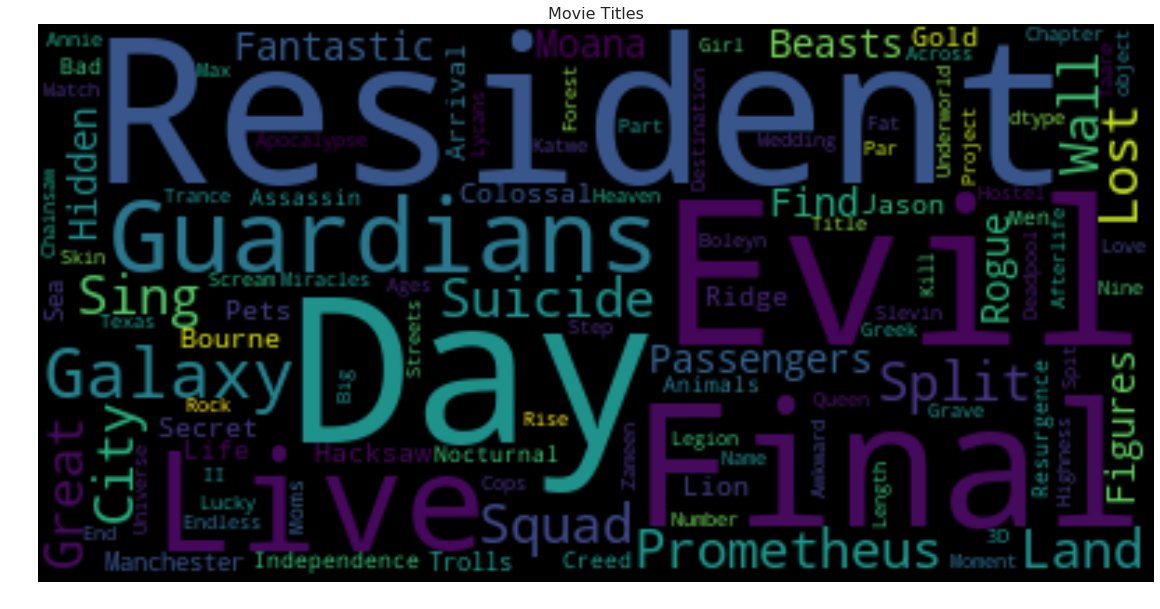

In [52]:
plt.subplots(figsize=(20,15))
plt.title('Movie Titles',fontsize=16)
text=str(data.Title)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

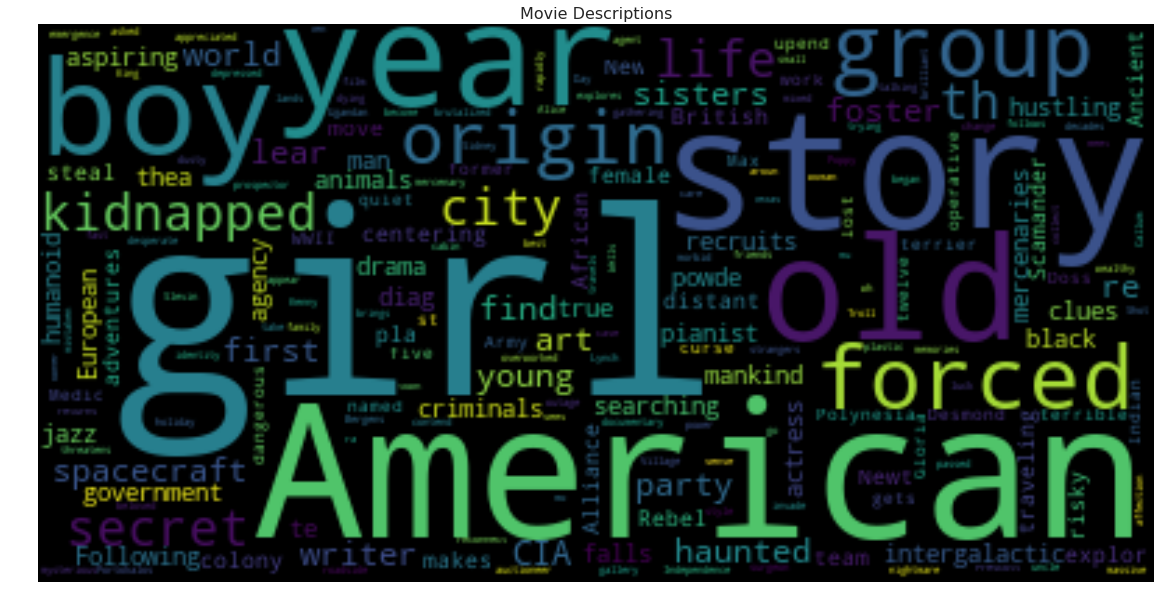

In [53]:
plt.subplots(figsize=(20,15))
text=str(data.Description)
wordcloud = WordCloud( stopwords=stopwords).generate(text)
plt.title('Movie Descriptions',fontsize=16)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**I am new to Data Science and i would realy appreciate your opinions.
Thanks a lot for your time in advance.
**